In [3]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from datetime import datetime
from datetime import timedelta
from xgboost import XGBRegressor
import xgboost as xgb
from xgboost import plot_importance
pd.set_option("display.max_rows", 500, "display.max_columns", 100)

In [4]:
## Notes

# drop user_pseudo_id's

In [5]:
data1 = pd.read_csv('..\\..\\IronHack\\Final Project\\halfbrick_jetpackjoyride_mission_ironhack_dataset_1.csv')
data2 = pd.read_csv('..\\..\\IronHack\\Final Project\\halfbrick_jetpackjoyride_mission_ironhack_dataset_2.csv')
data3 = pd.read_csv('..\\..\\IronHack\\Final Project\\halfbrick_jetpackjoyride_mission_ironhack_dataset_3.csv')

C:\Users\Romeo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,12,15,18,27,30,33,42,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
display(data1.shape)
display(data2.shape)
display(data2.shape)

(96734, 153)

(96734, 153)

(96734, 153)

In [7]:
data1

Unnamed: 0  user_pseudo_id  m1_mission_completed m1_mission_id  \
0               0        15725157                   3.0     Mission94   
1               1        85942635                   3.0    Mission113   
2               2        23900985                   3.0    Mission109   
3               3        58130048                   3.0     Mission94   
4               4        65693590                   3.0    Mission115   
...           ...             ...                   ...           ...   
96729       96729        13986658                   3.0    Mission115   
96730       96730        63553837                   3.0     Mission94   
96731       96731        74308079                   3.0    Mission115   
96732       96732        26596378                   3.0    Mission115   
96733       96733         2683761                   3.0    Mission115   

       m1_mission_difficulty  m1_mission_stars_collected  \
0                        2.0                         3.0   
1                        1.0                         3.0   
2                        1.0                         3.0   
3                        2.0                         1.0   
4                        1.0                         3.0   
...                      ...                         ...   
96729                    1.0                         3.0   
96730                    2.0                         1.0   
96731                    1.0                         3.0   
96732                    1.0                         3.0   
96733                    1.0                         3.0   

       m1_day_auto_increment  m1_lifetime_played_runs  m1_max_run_distance  \
0                        0.0                      2.0               1763.0   
1                        0.0                      1.0               1653.0   
2                        1.0                      2.0               1203.0   
3                        1.0                      2.0               1046.0   
4                        0.0                      1.0               1250.0   
...                      ...                      ...                  ...   
96729                    0.0                      1.0               1649.0   
96730                    1.0                      1.0               1515.0   
96731                    5.0                      2.0               1523.0   
96732                    0.0                      2.0               1187.0   
96733                    0.0                      1.0               3298.0   

       m1_total_purchases_virtual  m1_total_ads_watched  \
0                          2000.0                   0.0   
1                             0.0                   0.0   
2                             0.0                   0.0   
3                          1000.0                   0.0   
4                             0.0                   0.0   
...                           ...                   ...   
96729                         0.0                   0.0   
96730                         0.0                   0.0   
96731                      1500.0                   0.0   
96732                         0.0                   1.0   
96733                         0.0                   0.0   

       m1_total_purchases_real m1_geo_country  m1_days_played_in_month  \
0                          0.0       Honduras                      0.0   
1                          0.0        Belgium                      0.0   
2                          0.0        Vietnam                      1.0   
3                          0.0         Taiwan                      1.0   
4                          0.0     Bangladesh                      0.0   
...                        ...            ...                      ...   
96729                      0.0         Brazil                      0.0   
96730                      0.0         Brazil                      1.0   
96731                      0.0         Brazil                      4.0   
96732                  

In [8]:
data2

Unnamed: 0  user_pseudo_id  m1_mission_completed m1_mission_id  \
0           96733         2683761                   3.0    Mission115   
1           96734        40118644                   3.0    Mission113   
2           96735        95668595                   3.0    Mission115   
3           96736        60083360                   3.0    Mission115   
4           96737        46580988                   3.0    Mission113   
...           ...             ...                   ...           ...   
96729      193462        63686876                   3.0    Mission115   
96730      193463        19730035                   3.0    Mission115   
96731      193464        66120923                   3.0    Mission115   
96732      193465         7392857                   3.0    Mission115   
96733      193466        59165161                   3.0    Mission115   

       m1_mission_difficulty  m1_mission_stars_collected  \
0                        1.0                         3.0   
1                        1.0                         3.0   
2                        1.0                         3.0   
3                        1.0                         3.0   
4                        1.0                         3.0   
...                      ...                         ...   
96729                    1.0                         3.0   
96730                    1.0                         3.0   
96731                    1.0                         3.0   
96732                    1.0                         3.0   
96733                    1.0                         3.0   

       m1_day_auto_increment  m1_lifetime_played_runs  m1_max_run_distance  \
0                        0.0                      1.0               3298.0   
1                        0.0                      1.0               1780.0   
2                        0.0                      1.0               2023.0   
3                        1.0                      1.0               1693.0   
4                        0.0                      1.0               1454.0   
...                      ...                      ...                  ...   
96729                    0.0                      1.0               1069.0   
96730                    0.0                      1.0               1319.0   
96731                    0.0                      1.0               1460.0   
96732                    0.0                      1.0               1215.0   
96733                    0.0                      1.0               1065.0   

       m1_total_purchases_virtual  m1_total_ads_watched  \
0                             0.0                   0.0   
1                             0.0                   0.0   
2                             0.0                   0.0   
3                             0.0                   0.0   
4                             0.0                   0.0   
...                           ...                   ...   
96729                      1500.0                   0.0   
96730                         0.0                   0.0   
96731                         0.0                   0.0   
96732                         0.0                   0.0   
96733                         0.0                   0.0   

       m1_total_purchases_real m1_geo_country  m1_days_played_in_month  \
0                          0.0         Brazil                      0.0   
1                          0.0         Brazil                      0.0   
2                          0.0         Brazil                      0.0   
3                          0.0         Brazil                      1.0   
4                          0.0         Brazil                      0.0   
...                        ...            ...                      ...   
96729                      0.0        Nigeria                      0.0   
96730                      0.0        Nigeria                      0.0   
96731                      0.0        Nigeria                      0.0   
96732                  

In [9]:
data3

Unnamed: 0  user_pseudo_id  m1_mission_completed m1_mission_id  \
0          193466        59165161                   3.0    Mission115   
1          193467        10837730                   3.0    Mission115   
2          193468        72690218                   3.0    Mission115   
3          193469        30055875                   3.0    Mission113   
4          193470        96209461                   3.0    Mission115   
...           ...             ...                   ...           ...   
96729      290195        60821427                   3.0    Mission113   
96730      290196         6627955                   3.0    Mission115   
96731      290197        30584741                   3.0    Mission115   
96732      290198        62949474                   3.0    Mission113   
96733      290199        57543559                   3.0    Mission115   

       m1_mission_difficulty  m1_mission_stars_collected  \
0                        1.0                         3.0   
1                        1.0                         3.0   
2                        1.0                         3.0   
3                        1.0                         3.0   
4                        1.0                         3.0   
...                      ...                         ...   
96729                    1.0                         1.0   
96730                    1.0                         3.0   
96731                    1.0                         3.0   
96732                    1.0                         3.0   
96733                    1.0                         3.0   

       m1_day_auto_increment  m1_lifetime_played_runs  m1_max_run_distance  \
0                        0.0                      1.0               1065.0   
1                        1.0                      1.0               1049.0   
2                        0.0                      1.0               1309.0   
3                        1.0                      1.0               1050.0   
4                        0.0                      1.0               1368.0   
...                      ...                      ...                  ...   
96729                    0.0                      1.0               1373.0   
96730                    0.0                      1.0               3046.0   
96731                    0.0                      1.0               1019.0   
96732                    0.0                      1.0               2206.0   
96733                    0.0                      1.0               1380.0   

       m1_total_purchases_virtual  m1_total_ads_watched  \
0                             0.0                   0.0   
1                             0.0                   0.0   
2                             0.0                   0.0   
3                             0.0                   0.0   
4                             0.0                   0.0   
...                           ...                   ...   
96729                      1500.0                   0.0   
96730                         0.0                   0.0   
96731                      3000.0                   0.0   
96732                      5000.0                   0.0   
96733                         0.0                   0.0   

       m1_total_purchases_real  m1_geo_country  m1_days_played_in_month  \
0                          0.0         Nigeria                      0.0   
1                          0.0         Nigeria                      0.0   
2                          0.0         Nigeria                      0.0   
3                          0.0         Nigeria                      1.0   
4                          0.0         Nigeria                      0.0   
...                        ...             ...                      ...   
96729                      0.0  United Kingdom                      0.0   
96730                      0.0  United Kingdom                      0.0   
96731                      0.0  United Kingdom                      0.0   
96732        

In [10]:
data = pd.concat([data1,data2,data3], axis =0).reset_index(drop=True)

In [11]:
# data_og = pd.read_csv('..\\..\\IronHack\\Final Project\\bq-results-20220518-221016-1652911848367.csv')

In [12]:
# %%time
# ProfileReport(data)

In [13]:
data

Unnamed: 0  user_pseudo_id  m1_mission_completed m1_mission_id  \
0                0        15725157                   3.0     Mission94   
1                1        85942635                   3.0    Mission113   
2                2        23900985                   3.0    Mission109   
3                3        58130048                   3.0     Mission94   
4                4        65693590                   3.0    Mission115   
...            ...             ...                   ...           ...   
290197      290195        60821427                   3.0    Mission113   
290198      290196         6627955                   3.0    Mission115   
290199      290197        30584741                   3.0    Mission115   
290200      290198        62949474                   3.0    Mission113   
290201      290199        57543559                   3.0    Mission115   

        m1_mission_difficulty  m1_mission_stars_collected  \
0                         2.0                         3.0   
1                         1.0                         3.0   
2                         1.0                         3.0   
3                         2.0                         1.0   
4                         1.0                         3.0   
...                       ...                         ...   
290197                    1.0                         1.0   
290198                    1.0                         3.0   
290199                    1.0                         3.0   
290200                    1.0                         3.0   
290201                    1.0                         3.0   

        m1_day_auto_increment  m1_lifetime_played_runs  m1_max_run_distance  \
0                         0.0                      2.0               1763.0   
1                         0.0                      1.0               1653.0   
2                         1.0                      2.0               1203.0   
3                         1.0                      2.0               1046.0   
4                         0.0                      1.0               1250.0   
...                       ...                      ...                  ...   
290197                    0.0                      1.0               1373.0   
290198                    0.0                      1.0               3046.0   
290199                    0.0                      1.0               1019.0   
290200                    0.0                      1.0               2206.0   
290201                    0.0                      1.0               1380.0   

        m1_total_purchases_virtual  m1_total_ads_watched  \
0                           2000.0                   0.0   
1                              0.0                   0.0   
2                              0.0                   0.0   
3                           1000.0                   0.0   
4                              0.0                   0.0   
...                            ...                   ...   
290197                      1500.0                   0.0   
290198                         0.0                   0.0   
290199                      3000.0                   0.0   
290200                      5000.0                   0.0   
290201                         0.0                   0.0   

        m1_total_purchases_real  m1_geo_country  m1_days_played_in_month  \
0                           0.0        Honduras                      0.0   
1                           0.0         Belgium                      0.0   
2                           0.0         Vietnam                      1.0   
3                           0.0          Taiwan                      1.0   
4                           0.0      Bangladesh                      0.0   
...                         ...             ...                      ...   
290197                      0.0  United Kingdom                      0.0   
290198                      0.0  United Kingdom                      0.0   
290199                      0.0 

In [14]:
data.columns

Index(['Unnamed: 0', 'user_pseudo_id', 'm1_mission_completed', 'm1_mission_id',
       'm1_mission_difficulty', 'm1_mission_stars_collected',
       'm1_day_auto_increment', 'm1_lifetime_played_runs',
       'm1_max_run_distance', 'm1_total_purchases_virtual',
       ...
       'm10_max_run_distance', 'm10_total_purchases_virtual',
       'm10_total_ads_watched', 'm10_total_purchases_real', 'm10_geo_country',
       'm10_days_played_in_month', 'm10_virtual_currency_balance',
       'm10_event_timestamp', 'user_pseudo_id_10', 'target_max_day_played'],
      dtype='object', length=153)

In [15]:
data[['m4_max_run_distance']].max()

m4_max_run_distance    57880.0
dtype: float64

In [16]:
data.tail(100)

Unnamed: 0  user_pseudo_id  m1_mission_completed m1_mission_id  \
290102      290100        90886519                   3.0    Mission113   
290103      290101        27542373                   3.0    Mission115   
290104      290102        77130889                   3.0    Mission113   
290105      290103        17096423                   3.0    Mission115   
290106      290104        17791470                   3.0    Mission115   
290107      290105        96086146                   3.0    Mission113   
290108      290106        67514694                   3.0    Mission115   
290109      290107        15812743                   3.0    Mission113   
290110      290108        30125706                   3.0    Mission115   
290111      290109         4403240                   3.0    Mission115   
290112      290110        28852530                   3.0    Mission115   
290113      290111        24406130                   3.0    Mission113   
290114      290112         9797519                   3.0    Mission113   
290115      290113        40982178                   3.0    Mission113   
290116      290114        45319106                   3.0    Mission115   
290117      290115        89141360                   3.0    Mission113   
290118      290116        16369702                   3.0    Mission115   
290119      290117        30126930                   3.0    Mission115   
290120      290118        34105966                   3.0    Mission115   
290121      290119        17800850                   3.0    Mission115   
290122      290120        97189243                   3.0     Mission94   
290123      290121        25987198                   3.0    Mission115   
290124      290122        65813968                   3.0    Mission115   
290125      290123        55280315                   3.0    Mission115   
290126      290124        71037476                   3.0    Mission115   
290127      290125        31793270                   3.0    Mission115   
290128      290126        91675045                   3.0    Mission115   
290129      290127        24347408                   3.0    Mission115   
290130      290128        55594359                   3.0    Mission115   
290131      290129        81271426                   3.0    Mission115   
290132      290130        40320139                   3.0    Mission115   
290133      290131        43449024                   3.0    Mission115   
290134      290132         3336598                   3.0    Mission113   
290135      290133        45667441                   3.0    Mission115   
290136      290134        78699688                   3.0    Mission113   
290137      290135        30684554                   3.0    Mission115   
290138      290136        65622191                   3.0    Mission115   
290139      290137        63439775                   3.0    Mission115   
290140      290138        60553436                   3.0    Mission113   
290141      290139        69660282                   3.0    Mission113   
290142      290140        78942783                   3.0    Mission115   
290143      290141        17152677                   3.0    Mission115   
290144      290142        19102868                   3.0    Mission115   
290145      290143        53570995                   3.0    Mission115   
290146      290144        85952734                   3.0    Mission115   
290147      290145        32051125                   3.0    Mission113   
290148      290146        44188509                   3.0    Mission113   
290149      290147        37805456                   3.0    Mission109   
290150      290148        70088216                   3.0    Mission115   
290151      290149        97373922                   3.0    Mission113   
290152      290150        67315235                   3.0    Mission113   
290153      290151         6791897                   3.0    Mission115   
290154      290152        38566155                   3.0    Mission115   
290155      

In [17]:
data['target_max_day_played'].value_counts()

1           36196
2           35972
3           31532
4           26356
0           23409
5           21898
6           18121
7           14678
8           12177
9           10122
10           8179
11           6911
12           5632
13           4802
14           4017
15           3503
16           2983
17           2584
18           2333
19           1948
20           1717
21           1457
22           1351
23           1143
24           1042
25            891
26            830
27            723
28            633
29            582
30            530
31            466
32            441
33            391
34            355
35            330
36            288
38            257
37            247
39            232
40            210
42            177
44            170
41            168
43            167
45            137
46            134
47            134
48            123
49             85
52             79
50             78
51             77
54             74
55             68
53        

In [18]:
user_pseudo_id = data.filter(like='user_pseudo_id',axis=1)

In [19]:
user_pseudo_id.columns

Index(['user_pseudo_id', 'user_pseudo_id_1', 'user_pseudo_id_2',
       'user_pseudo_id_3', 'user_pseudo_id_4', 'user_pseudo_id_5',
       'user_pseudo_id_6', 'user_pseudo_id_7', 'user_pseudo_id_8',
       'user_pseudo_id_9', 'user_pseudo_id_10'],
      dtype='object')

In [20]:
drop_columns_list = list(user_pseudo_id.columns)

In [21]:
drop_columns_list

['user_pseudo_id',
 'user_pseudo_id_1',
 'user_pseudo_id_2',
 'user_pseudo_id_3',
 'user_pseudo_id_4',
 'user_pseudo_id_5',
 'user_pseudo_id_6',
 'user_pseudo_id_7',
 'user_pseudo_id_8',
 'user_pseudo_id_9',
 'user_pseudo_id_10']

In [22]:
data.shape

(290202, 153)

In [23]:
data_dropped = data.drop(columns=drop_columns_list)
data_dropped.shape

(290202, 142)

In [24]:
data_dropped.head(1)

Unnamed: 0  m1_mission_completed m1_mission_id  m1_mission_difficulty  \
0           0                   3.0     Mission94                    2.0   

   m1_mission_stars_collected  m1_day_auto_increment  m1_lifetime_played_runs  \
0                         3.0                    0.0                      2.0   

   m1_max_run_distance  m1_total_purchases_virtual  m1_total_ads_watched  \
0               1763.0                      2000.0                   0.0   

   m1_total_purchases_real m1_geo_country  m1_days_played_in_month  \
0                      0.0       Honduras                      0.0   

   m1_virtual_currency_balance           m1_event_timestamp  \
0                       5000.0  2022-03-02 15:46:04.025 UTC   

   m2_mission_completed m2_mission_id  m2_mission_difficulty  \
0                   4.0    Mission109                    1.0   

   m2_mission_stars_collected  m2_day_auto_increment  m2_lifetime_played_runs  \
0                         4.0                    0.0                      3.0   

   m2_max_run_distance  m2_total_purchases_virtual  m2_total_ads_watched  \
0               2266.0                      2000.0                   0.0   

   m2_total_purchases_real m2_geo_country  m2_days_played_in_month  \
0                      0.0       Honduras                      0.0   

   m2_virtual_currency_balance           m2_event_timestamp  \
0                       4238.0  2022-03-02 15:46:51.889 UTC   

   m3_mission_completed m3_mission_id  m3_mission_difficulty  \
0                   5.0    Mission115                    1.0   

   m3_mission_stars_collected  m3_day_auto_increment  m3_lifetime_played_runs  \
0                         5.0                    0.0                      8.0   

   m3_max_run_distance  m3_total_purchases_virtual  m3_total_ads_watched  \
0               2266.0                      3500.0                   0.0   

   m3_total_purchases_real m3_geo_country  m3_days_played_in_month  \
0                      0.0       Honduras                      0.0   

   m3_virtual_currency_balance           m3_event_timestamp  \
0                       3561.0  2022-03-02 15:54:49.526 UTC   

   m4_mission_completed m4_mission_id  m4_mission_difficulty  \
0                   6.0    Mission114                    1.0   

   m4_mission_stars_collected  m4_day_auto_increment  m4_lifetime_played_runs  \
0                         6.0                    2.0                      9.0   

   m4_max_run_distance  ...  m7_total_purchases_virtual  m7_total_ads_watched  \
0               2266.0  ...                      7000.0                   0.0   

   m7_total_purchases_real m7_geo_country  m7_days_played_in_month  \
0                      0.0       Honduras                      3.0   

   m7_virtual_currency_balance           m8_event_timestamp  \
0                       2446.0  2022-03-14 02:00:19.959 UTC   

   m8_mission_completed m8_mission_id  m8_mission_difficulty  \
0                  10.0      Mission6                    1.0   

   m8_mission_stars_collected  m8_day_auto_increment  m8_lifetime_played_runs  \
0                        11.0                    3.0                     20.0   

   m8_max_run_distance  m8_total_purchases_virtual  m8_total_ads_watched  \
0               2585.0                      7000.0                   0.0   

   m8_total_purchases_real m8_geo_country  m8_days_played_in_month  \
0                      0.0       Honduras                      3.0   

   m8_virtual_currency_balance         m8_event_timestamp_1  \
0                       2752.0  2022-03-14 02:01:13.236 UTC   

   m9_mission_completed m9_mission_id  m9_mission_difficulty  \
0                  11.0     Mission86                    2.0   

   m9_mission_stars_collected  m9_day_auto_increment  m9_lifetime_played_runs  \
0                        12.0                    3.0                     21.0   

   m9_max_run_distance  m9_total_purchases_virtual  m9_total_ads_watched  \
0               2585.0              

In [25]:
data_dropped = data_dropped.drop(['Unnamed: 0'],axis=1)
data_dropped.shape

(290202, 141)

In [26]:
data_dropped.head(1).T

0
m1_mission_completed                                  3.0
m1_mission_id                                   Mission94
m1_mission_difficulty                                 2.0
m1_mission_stars_collected                            3.0
m1_day_auto_increment                                 0.0
m1_lifetime_played_runs                               2.0
m1_max_run_distance                                1763.0
m1_total_purchases_virtual                         2000.0
m1_total_ads_watched                                  0.0
m1_total_purchases_real                               0.0
m1_geo_country                                   Honduras
m1_days_played_in_month                               0.0
m1_virtual_currency_balance                        5000.0
m1_event_timestamp            2022-03-02 15:46:04.025 UTC
m2_mission_completed                                  4.0
m2_mission_id                                  Mission109
m2_mission_difficulty                                 1.0
m2_mission_stars_collected                            4.0
m2_day_auto_increment                                 0.0
m2_lifetime_played_runs                               3.0
m2_max_run_distance                                2266.0
m2_total_purchases_virtual                         2000.0
m2_total_ads_watched                                  0.0
m2_total_purchases_real                               0.0
m2_geo_country                                   Honduras
m2_days_played_in_month                               0.0
m2_virtual_currency_balance                        4238.0
m2_event_timestamp            2022-03-02 15:46:51.889 UTC
m3_mission_completed                                  5.0
m3_mission_id                                  Mission115
m3_mission_difficulty                                 1.0
m3_mission_stars_collected                            5.0
m3_day_auto_increment                                 0.0
m3_lifetime_played_runs                               8.0
m3_max_run_distance                                2266.0
m3_total_purchases_virtual                         3500.0
m3_total_ads_watched                                  0.0
m3_total_purchases_real                               0.0
m3_geo_country                                   Honduras
m3_days_played_in_month                               0.0
m3_virtual_currency_balance                        3561.0
m3_event_timestamp            2022-03-02 15:54:49.526 UTC
m4_mission_completed                                  6.0
m4_mission_id                                  Mission114
m4_mission_difficulty                                 1.0
m4_mission_stars_collected                            6.0
m4_day_auto_increment                                 2.0
m4_lifetime_played_runs                               9.0
m4_max_run_distance                                2266.0
m4_total_purchases_virtual                         3500.0
m4_total_ads_watched                                  0.0
m4_total_purchases_real                               0.0
m4_geo_country                                   Honduras
m4_days_played_in_month                               2.0
m4_virtual_currency_balance                        4284.0
m4_event_timestamp            2022-03-05 17:52:48.383 UTC
m5_mission_completed                                  7.0
m5_mission_id                                    Mission3
m5_mission_difficulty                                 1.0
m5_mission_stars_collected                            7.0
m5_day_auto_increment                                 2.0
m5_lifetime_played_runs                              12.0
m5_max_run_distance                                2266.0
m5_total_purchases_virtual                         7000.0
m5_total_ads_watched                                  0.0
m5_total_purchases_real                               0.0
m5_geo_country                                   Honduras
m5_days_played_in_month                               2.0
m5_virtual_currency_balance                        130

In [27]:
lifetime_played_runs = data_dropped.filter(like='lifetime_played_runs',axis=1)

In [28]:
lifetime_played_runs.head(1)

m1_lifetime_played_runs  m2_lifetime_played_runs  m3_lifetime_played_runs  \
0                      2.0                      3.0                      8.0   

   m4_lifetime_played_runs  m5_lifetime_played_runs  m6_lifetime_played_runs  \
0                      9.0                     12.0                     19.0   

   m7_lifetime_played_runs  m8_lifetime_played_runs  m9_lifetime_played_runs  \
0                     19.0                     20.0                     21.0   

   m10_lifetime_played_runs  
0                      23.0

In [29]:
data_dropped.tail(1)

m1_mission_completed m1_mission_id  m1_mission_difficulty  \
290201                   3.0    Mission115                    1.0   

        m1_mission_stars_collected  m1_day_auto_increment  \
290201                         3.0                    0.0   

        m1_lifetime_played_runs  m1_max_run_distance  \
290201                      1.0               1380.0   

        m1_total_purchases_virtual  m1_total_ads_watched  \
290201                         0.0                   0.0   

        m1_total_purchases_real  m1_geo_country  m1_days_played_in_month  \
290201                      0.0  United Kingdom                      0.0   

        m1_virtual_currency_balance           m1_event_timestamp  \
290201                       5588.0  2022-02-11 20:29:04.483 UTC   

        m2_mission_completed m2_mission_id  m2_mission_difficulty  \
290201                   4.0    Mission109                    1.0   

        m2_mission_stars_collected  m2_day_auto_increment  \
290201                         4.0                    1.0   

        m2_lifetime_played_runs  m2_max_run_distance  \
290201                      2.0               1380.0   

        m2_total_purchases_virtual  m2_total_ads_watched  \
290201                         0.0                   0.0   

        m2_total_purchases_real  m2_geo_country  m2_days_played_in_month  \
290201                      0.0  United Kingdom                      1.0   

        m2_virtual_currency_balance           m2_event_timestamp  \
290201                       5667.0  2022-02-12 19:01:39.216 UTC   

        m3_mission_completed m3_mission_id  m3_mission_difficulty  \
290201                   5.0    Mission113                    1.0   

        m3_mission_stars_collected  m3_day_auto_increment  \
290201                         5.0                    1.0   

        m3_lifetime_played_runs  m3_max_run_distance  \
290201                      3.0               1380.0   

        m3_total_purchases_virtual  m3_total_ads_watched  \
290201                      5500.0                   1.0   

        m3_total_purchases_real  m3_geo_country  m3_days_played_in_month  \
290201                      0.0  United Kingdom                      1.0   

        m3_virtual_currency_balance           m3_event_timestamp  \
290201                        645.0  2022-02-12 19:04:37.206 UTC   

        m4_mission_completed m4_mission_id  m4_mission_difficulty  \
290201                   6.0    Mission114                    1.0   

        m4_mission_stars_collected  m4_day_auto_increment  \
290201                         6.0                    1.0   

        m4_lifetime_played_runs  m4_max_run_distance  \
290201                      4.0               1380.0   

        m4_total_purchases_virtual  ...  m7_total_purchases_virtual  \
290201                      5500.0  ...                      5500.0   

        m7_total_ads_watched m7_total_purchases_real  m7_geo_country  \
290201                  11.0                     0.0  United Kingdom   

        m7_days_played_in_month m7_virtual_currency_balance  \
290201                      1.0                     10786.0   

                 m8_event_timestamp m8_mission_completed  m8_mission_id  \
290201  2022-02-12 19:25:58.911 UTC                 10.0      Mission19   

        m8_mission_difficulty  m8_mission_stars_collected  \
290201                    2.0                         9.0   

        m8_day_auto_increment  m8_lifetime_played_runs  m8_max_run_distance  \
290201                    1.0                     12.0               1740.0   

        m8_total_purchases_virtual  m8_total_ads_watched  \
290201                      5500.0                  12.0   

       m8_total_purchases_real  m8_geo_country  m8_days_played_in_month  \
290201                     0.0  United Kingdom                      1.0   

       m8_virtual_currency_balance         m8_event_timestamp_1  \
290201                     10786.0  2022-02-12 19:27:31.618 UTC   

       m9_mission_co

In [30]:
data_dropped['m10_max_run_distance'].isna().sum()

941

In [31]:
data_dropped.dtypes

m1_mission_completed            float64
m1_mission_id                    object
m1_mission_difficulty           float64
m1_mission_stars_collected      float64
m1_day_auto_increment           float64
m1_lifetime_played_runs         float64
m1_max_run_distance             float64
m1_total_purchases_virtual      float64
m1_total_ads_watched            float64
m1_total_purchases_real         float64
m1_geo_country                   object
m1_days_played_in_month         float64
m1_virtual_currency_balance     float64
m1_event_timestamp               object
m2_mission_completed            float64
m2_mission_id                    object
m2_mission_difficulty           float64
m2_mission_stars_collected      float64
m2_day_auto_increment           float64
m2_lifetime_played_runs         float64
m2_max_run_distance             float64
m2_total_purchases_virtual      float64
m2_total_ads_watched            float64
m2_total_purchases_real         float64
m2_geo_country                   object


In [32]:
data_dropped.shape

(290202, 141)

In [33]:
data_dropped.isna().sum()

m1_mission_completed            19853
m1_mission_id                   19853
m1_mission_difficulty           19853
m1_mission_stars_collected      19853
m1_day_auto_increment           19854
m1_lifetime_played_runs         20658
m1_max_run_distance             20658
m1_total_purchases_virtual      20675
m1_total_ads_watched            20680
m1_total_purchases_real         20680
m1_geo_country                  19995
m1_days_played_in_month         20659
m1_virtual_currency_balance     20658
m1_event_timestamp              19853
m2_mission_completed            19044
m2_mission_id                   19044
m2_mission_difficulty           19044
m2_mission_stars_collected      19044
m2_day_auto_increment           19045
m2_lifetime_played_runs         19857
m2_max_run_distance             19857
m2_total_purchases_virtual      19870
m2_total_ads_watched            19877
m2_total_purchases_real         19877
m2_geo_country                  19204
m2_days_played_in_month         19858
m2_virtual_c

In [34]:
data_dropped[data_dropped['m1_mission_completed'].isna()].T

323     \
m1_mission_completed                                  NaN   
m1_mission_id                                         NaN   
m1_mission_difficulty                                 NaN   
m1_mission_stars_collected                            NaN   
m1_day_auto_increment                                 NaN   
m1_lifetime_played_runs                               NaN   
m1_max_run_distance                                   NaN   
m1_total_purchases_virtual                            NaN   
m1_total_ads_watched                                  NaN   
m1_total_purchases_real                               NaN   
m1_geo_country                                        NaN   
m1_days_played_in_month                               NaN   
m1_virtual_currency_balance                           NaN   
m1_event_timestamp                                    NaN   
m2_mission_completed                                  4.0   
m2_mission_id                                   Dynamic41   
m2_mission_difficulty                                 2.0   
m2_mission_stars_collected                            5.0   
m2_day_auto_increment                                 2.0   
m2_lifetime_played_runs                               4.0   
m2_max_run_distance                                3177.0   
m2_total_purchases_virtual                         1500.0   
m2_total_ads_watched                                  4.0   
m2_total_purchases_real                               0.0   
m2_geo_country                                     Sweden   
m2_days_played_in_month                               1.0   
m2_virtual_currency_balance                        7336.0   
m2_event_timestamp            2022-02-20 14:42:26.947 UTC   
m3_mission_completed                                  5.0   
m3_mission_id                                  Mission122   
m3_mission_difficulty                                 1.0   
m3_mission_stars_collected                            7.0   
m3_day_auto_increment                                 2.0   
m3_lifetime_played_runs                               5.0   
m3_max_run_distance                                3177.0   
m3_total_purchases_virtual                         1500.0   
m3_total_ads_watched                                  5.0   
m3_total_purchases_real                               0.0   
m3_geo_country                                     Sweden   
m3_days_played_in_month                               1.0   
m3_virtual_currency_balance                        8470.0   
m3_event_timestamp            2022-02-20 14:45:28.996 UTC   
m4_mission_completed                                  6.0   
m4_mission_id                                   Mission94   
m4_mission_difficulty                                 2.0   
m4_mission_stars_collected                            8.0   
m4_day_auto_increment                                 2.0   
m4_lifetime_played_runs                               7.0   
m4_max_run_distance                                3332.0   
m4_total_purchases_virtual                         1500.0   
m4_total_ads_watched                                  7.0   
m4_total_purchases_real                               0.0   
m4_geo_country                                     Sweden   
m4_days_played_in_month                               1.0   
m4_virtual_currency_balance                        9990.0   
m4_event_timestamp            2022-02-20 14:50:50.791 UTC   
m5_mission_completed                                  7.0   
m5_mission_id                                  Mission113   
m5_mission_difficulty                                 1.0   
m5_mission_stars_collected                           10.0   
m5_day_auto_increment                                 2.0   
m5_lifetime_played_runs                               9.0   
m5_max_run_distance                                3332.0   
m5_total_purchases_virtual                        11500.0   
m5_total_ads_watched                                 10.0   
m5_total_purchases_real  

In [35]:
data_dropped[data_dropped['m1_mission_completed'].isna()==False].T

0       \
m1_mission_completed                                  3.0   
m1_mission_id                                   Mission94   
m1_mission_difficulty                                 2.0   
m1_mission_stars_collected                            3.0   
m1_day_auto_increment                                 0.0   
m1_lifetime_played_runs                               2.0   
m1_max_run_distance                                1763.0   
m1_total_purchases_virtual                         2000.0   
m1_total_ads_watched                                  0.0   
m1_total_purchases_real                               0.0   
m1_geo_country                                   Honduras   
m1_days_played_in_month                               0.0   
m1_virtual_currency_balance                        5000.0   
m1_event_timestamp            2022-03-02 15:46:04.025 UTC   
m2_mission_completed                                  4.0   
m2_mission_id                                  Mission109   
m2_mission_difficulty                                 1.0   
m2_mission_stars_collected                            4.0   
m2_day_auto_increment                                 0.0   
m2_lifetime_played_runs                               3.0   
m2_max_run_distance                                2266.0   
m2_total_purchases_virtual                         2000.0   
m2_total_ads_watched                                  0.0   
m2_total_purchases_real                               0.0   
m2_geo_country                                   Honduras   
m2_days_played_in_month                               0.0   
m2_virtual_currency_balance                        4238.0   
m2_event_timestamp            2022-03-02 15:46:51.889 UTC   
m3_mission_completed                                  5.0   
m3_mission_id                                  Mission115   
m3_mission_difficulty                                 1.0   
m3_mission_stars_collected                            5.0   
m3_day_auto_increment                                 0.0   
m3_lifetime_played_runs                               8.0   
m3_max_run_distance                                2266.0   
m3_total_purchases_virtual                         3500.0   
m3_total_ads_watched                                  0.0   
m3_total_purchases_real                               0.0   
m3_geo_country                                   Honduras   
m3_days_played_in_month                               0.0   
m3_virtual_currency_balance                        3561.0   
m3_event_timestamp            2022-03-02 15:54:49.526 UTC   
m4_mission_completed                                  6.0   
m4_mission_id                                  Mission114   
m4_mission_difficulty                                 1.0   
m4_mission_stars_collected                            6.0   
m4_day_auto_increment                                 2.0   
m4_lifetime_played_runs                               9.0   
m4_max_run_distance                                2266.0   
m4_total_purchases_virtual                         3500.0   
m4_total_ads_watched                                  0.0   
m4_total_purchases_real                               0.0   
m4_geo_country                                   Honduras   
m4_days_played_in_month                               2.0   
m4_virtual_currency_balance                        4284.0   
m4_event_timestamp            2022-03-05 17:52:48.383 UTC   
m5_mission_completed                                  7.0   
m5_mission_id                                    Mission3   
m5_mission_difficulty                                 1.0   
m5_mission_stars_collected                            7.0   
m5_day_auto_increment                                 2.0   
m5_lifetime_played_runs                              12.0   
m5_max_run_distance                                2266.0   
m5_total_purchases_virtual                         7000.0   
m5_total_ads_watched                                  0.0   
m5_total_purchases_real  

### NaN values in the first few missions gives us an indication that the player had completed these stages in the prior months. However, further investigation is required to understand the NaN values in the last few missions

In [36]:
data_nan = data_dropped[data_dropped['m1_mission_completed'].isna()]

In [37]:
data_nan.shape

(19853, 141)

In [38]:
data_dropped[data_dropped['m10_lifetime_played_runs'].isna()].T

125     \
m1_mission_completed                                  3.0   
m1_mission_id                                  Mission115   
m1_mission_difficulty                                 1.0   
m1_mission_stars_collected                            3.0   
m1_day_auto_increment                                 0.0   
m1_lifetime_played_runs                               NaN   
m1_max_run_distance                                   NaN   
m1_total_purchases_virtual                            NaN   
m1_total_ads_watched                                  NaN   
m1_total_purchases_real                               NaN   
m1_geo_country                                      China   
m1_days_played_in_month                               NaN   
m1_virtual_currency_balance                           NaN   
m1_event_timestamp            2022-02-05 12:07:53.223 UTC   
m2_mission_completed                                  4.0   
m2_mission_id                                  Mission113   
m2_mission_difficulty                                 1.0   
m2_mission_stars_collected                            3.0   
m2_day_auto_increment                                 0.0   
m2_lifetime_played_runs                               NaN   
m2_max_run_distance                                   NaN   
m2_total_purchases_virtual                            NaN   
m2_total_ads_watched                                  NaN   
m2_total_purchases_real                               NaN   
m2_geo_country                                      China   
m2_days_played_in_month                               NaN   
m2_virtual_currency_balance                           NaN   
m2_event_timestamp            2022-02-05 12:08:29.328 UTC   
m3_mission_completed                                  5.0   
m3_mission_id                                  Mission109   
m3_mission_difficulty                                 1.0   
m3_mission_stars_collected                            3.0   
m3_day_auto_increment                                 0.0   
m3_lifetime_played_runs                               NaN   
m3_max_run_distance                                   NaN   
m3_total_purchases_virtual                            NaN   
m3_total_ads_watched                                  NaN   
m3_total_purchases_real                               NaN   
m3_geo_country                                      China   
m3_days_played_in_month                               NaN   
m3_virtual_currency_balance                           NaN   
m3_event_timestamp            2022-02-05 12:08:29.339 UTC   
m4_mission_completed                                  6.0   
m4_mission_id                                   Mission11   
m4_mission_difficulty                                 1.0   
m4_mission_stars_collected                            6.0   
m4_day_auto_increment                                 0.0   
m4_lifetime_played_runs                               NaN   
m4_max_run_distance                                   NaN   
m4_total_purchases_virtual                            NaN   
m4_total_ads_watched                                  NaN   
m4_total_purchases_real                               NaN   
m4_geo_country                                      China   
m4_days_played_in_month                               NaN   
m4_virtual_currency_balance                           NaN   
m4_event_timestamp             2022-02-05 12:11:37.19 UTC   
m5_mission_completed                                  7.0   
m5_mission_id                                  Mission114   
m5_mission_difficulty                                 1.0   
m5_mission_stars_collected                            6.0   
m5_day_auto_increment                                 0.0   
m5_lifetime_played_runs                               NaN   
m5_max_run_distance                                   NaN   
m5_total_purchases_virtual                            NaN   
m5_total_ads_watched                                  NaN   
m5_total_purchases_real  

In [39]:
# data_dropped[data_dropped['m10_lifetime_played_runs'].isna()

### It seems that the NaN values post mission 7 are due to coding errors, so those will be dropped. However, the NaN values for missions 1 to 7 will be stored in a seperate table for further analysis as to why these players game back to the game

In [40]:
data_clean = data_dropped[data_dropped['m8_mission_completed'].notna()]
data_clean

m1_mission_completed m1_mission_id  m1_mission_difficulty  \
0                        3.0     Mission94                    2.0   
1                        3.0    Mission113                    1.0   
2                        3.0    Mission109                    1.0   
3                        3.0     Mission94                    2.0   
4                        3.0    Mission115                    1.0   
...                      ...           ...                    ...   
290197                   3.0    Mission113                    1.0   
290198                   3.0    Mission115                    1.0   
290199                   3.0    Mission115                    1.0   
290200                   3.0    Mission113                    1.0   
290201                   3.0    Mission115                    1.0   

        m1_mission_stars_collected  m1_day_auto_increment  \
0                              3.0                    0.0   
1                              3.0                    0.0   
2                              3.0                    1.0   
3                              1.0                    1.0   
4                              3.0                    0.0   
...                            ...                    ...   
290197                         1.0                    0.0   
290198                         3.0                    0.0   
290199                         3.0                    0.0   
290200                         3.0                    0.0   
290201                         3.0                    0.0   

        m1_lifetime_played_runs  m1_max_run_distance  \
0                           2.0               1763.0   
1                           1.0               1653.0   
2                           2.0               1203.0   
3                           2.0               1046.0   
4                           1.0               1250.0   
...                         ...                  ...   
290197                      1.0               1373.0   
290198                      1.0               3046.0   
290199                      1.0               1019.0   
290200                      1.0               2206.0   
290201                      1.0               1380.0   

        m1_total_purchases_virtual  m1_total_ads_watched  \
0                           2000.0                   0.0   
1                              0.0                   0.0   
2                              0.0                   0.0   
3                           1000.0                   0.0   
4                              0.0                   0.0   
...                            ...                   ...   
290197                      1500.0                   0.0   
290198                         0.0                   0.0   
290199                      3000.0                   0.0   
290200                      5000.0                   0.0   
290201                         0.0                   0.0   

        m1_total_purchases_real  m1_geo_country  m1_days_played_in_month  \
0                           0.0        Honduras                      0.0   
1                           0.0         Belgium                      0.0   
2                           0.0         Vietnam                      1.0   
3                           0.0          Taiwan                      1.0   
4                           0.0      Bangladesh                      0.0   
...                         ...             ...                      ...   
290197                      0.0  United Kingdom                      0.0   
290198                      0.0  United Kingdom                      0.0   
290199                      0.0  United Kingdom                      0.0   
290200                      0.0  United Kingdom                      0.0   
290201                      0.0  United Kingdom                      0.0   

        m1_virtual_currency_balance           m1_event_timestamp  \
0                            5000.0  2022-03-02 15:46:04.025 UTC   
1  

In [41]:
data_clean.isna().sum()

m1_mission_completed            10746
m1_mission_id                   10746
m1_mission_difficulty           10746
m1_mission_stars_collected      10746
m1_day_auto_increment           10747
m1_lifetime_played_runs         11551
m1_max_run_distance             11551
m1_total_purchases_virtual      11568
m1_total_ads_watched            11573
m1_total_purchases_real         11573
m1_geo_country                  10888
m1_days_played_in_month         11552
m1_virtual_currency_balance     11551
m1_event_timestamp              10746
m2_mission_completed             9937
m2_mission_id                    9937
m2_mission_difficulty            9937
m2_mission_stars_collected       9937
m2_day_auto_increment            9938
m2_lifetime_played_runs         10750
m2_max_run_distance             10750
m2_total_purchases_virtual      10763
m2_total_ads_watched            10770
m2_total_purchases_real         10770
m2_geo_country                  10097
m2_days_played_in_month         10751
m2_virtual_c

In [42]:
data_clean = data_clean.dropna(axis=0)

In [43]:
data_clean.isna().sum()

m1_mission_completed            0
m1_mission_id                   0
m1_mission_difficulty           0
m1_mission_stars_collected      0
m1_day_auto_increment           0
m1_lifetime_played_runs         0
m1_max_run_distance             0
m1_total_purchases_virtual      0
m1_total_ads_watched            0
m1_total_purchases_real         0
m1_geo_country                  0
m1_days_played_in_month         0
m1_virtual_currency_balance     0
m1_event_timestamp              0
m2_mission_completed            0
m2_mission_id                   0
m2_mission_difficulty           0
m2_mission_stars_collected      0
m2_day_auto_increment           0
m2_lifetime_played_runs         0
m2_max_run_distance             0
m2_total_purchases_virtual      0
m2_total_ads_watched            0
m2_total_purchases_real         0
m2_geo_country                  0
m2_days_played_in_month         0
m2_virtual_currency_balance     0
m2_event_timestamp              0
m3_mission_completed            0
m3_mission_id 

In [44]:
data_clean.shape

(268188, 141)

### Convert date column to datetimestamp type

In [45]:
data_clean['m1_event_timestamp'] = data_clean['m1_event_timestamp'].astype('datetime64[ns]')
# data_clean['m1_event_timestamp'] = date_time = pd.to_datetime(data_clean['m1_event_timestamp'], format = '%d/%m/%Y %H:%M:%S')

C:\Users\Romeo\AppData\Local\Temp/ipykernel_15756/3469064218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['m1_event_timestamp'] = data_clean['m1_event_timestamp'].astype('datetime64[ns]')


In [46]:
data_clean[['m1_event_timestamp']]
# 2022-03-02 15:46:04.025 UTC

m1_event_timestamp
0      2022-03-02 15:46:04.025
1      2022-02-04 21:16:01.131
2      2022-02-19 04:23:19.464
3      2022-02-25 04:49:05.706
4      2022-02-14 15:37:03.106
...                        ...
290197 2022-02-21 05:21:46.025
290198 2022-02-12 03:18:44.128
290199 2022-02-12 11:32:31.859
290200 2022-02-01 09:42:20.333
290201 2022-02-11 20:29:04.483

[268188 rows x 1 columns]

In [47]:
data_clean.dtypes

m1_mission_completed                   float64
m1_mission_id                           object
m1_mission_difficulty                  float64
m1_mission_stars_collected             float64
m1_day_auto_increment                  float64
m1_lifetime_played_runs                float64
m1_max_run_distance                    float64
m1_total_purchases_virtual             float64
m1_total_ads_watched                   float64
m1_total_purchases_real                float64
m1_geo_country                          object
m1_days_played_in_month                float64
m1_virtual_currency_balance            float64
m1_event_timestamp              datetime64[ns]
m2_mission_completed                   float64
m2_mission_id                           object
m2_mission_difficulty                  float64
m2_mission_stars_collected             float64
m2_day_auto_increment                  float64
m2_lifetime_played_runs                float64
m2_max_run_distance                    float64
m2_total_purc

### data supplier confirmed that column m8_event_timestamp should be m7_event_timestamp and column m8_event_timestamp_1 should be m8_event_timestamp

In [48]:
data_clean = data_clean.rename(columns={'m8_event_timestamp': 'm7_event_timestamp', 'm8_event_timestamp_1':'m8_event_timestamp'})

In [49]:
%%time
data_clean['m2_event_timestamp'] = data_clean['m2_event_timestamp'].astype('datetime64[ns]')
data_clean['m3_event_timestamp'] = data_clean['m3_event_timestamp'].astype('datetime64[ns]')
data_clean['m4_event_timestamp'] = data_clean['m4_event_timestamp'].astype('datetime64[ns]')
data_clean['m5_event_timestamp'] = data_clean['m5_event_timestamp'].astype('datetime64[ns]')
data_clean['m6_event_timestamp'] = data_clean['m6_event_timestamp'].astype('datetime64[ns]')
data_clean['m7_event_timestamp'] = data_clean['m7_event_timestamp'].astype('datetime64[ns]')
data_clean['m8_event_timestamp'] = data_clean['m8_event_timestamp'].astype('datetime64[ns]')
data_clean['m9_event_timestamp'] = data_clean['m9_event_timestamp'].astype('datetime64[ns]')
data_clean['m10_event_timestamp'] = data_clean['m10_event_timestamp'].astype('datetime64[ns]')

Wall time: 5min 39s
Compiler : 362 ms


In [50]:
data_clean.dtypes

m1_mission_completed                   float64
m1_mission_id                           object
m1_mission_difficulty                  float64
m1_mission_stars_collected             float64
m1_day_auto_increment                  float64
m1_lifetime_played_runs                float64
m1_max_run_distance                    float64
m1_total_purchases_virtual             float64
m1_total_ads_watched                   float64
m1_total_purchases_real                float64
m1_geo_country                          object
m1_days_played_in_month                float64
m1_virtual_currency_balance            float64
m1_event_timestamp              datetime64[ns]
m2_mission_completed                   float64
m2_mission_id                           object
m2_mission_difficulty                  float64
m2_mission_stars_collected             float64
m2_day_auto_increment                  float64
m2_lifetime_played_runs                float64
m2_max_run_distance                    float64
m2_total_purc

In [51]:
data_clean.head().T

0  \
m1_mission_completed                                 3.0   
m1_mission_id                                  Mission94   
m1_mission_difficulty                                2.0   
m1_mission_stars_collected                           3.0   
m1_day_auto_increment                                0.0   
m1_lifetime_played_runs                              2.0   
m1_max_run_distance                               1763.0   
m1_total_purchases_virtual                        2000.0   
m1_total_ads_watched                                 0.0   
m1_total_purchases_real                              0.0   
m1_geo_country                                  Honduras   
m1_days_played_in_month                              0.0   
m1_virtual_currency_balance                       5000.0   
m1_event_timestamp            2022-03-02 15:46:04.025000   
m2_mission_completed                                 4.0   
m2_mission_id                                 Mission109   
m2_mission_difficulty                                1.0   
m2_mission_stars_collected                           4.0   
m2_day_auto_increment                                0.0   
m2_lifetime_played_runs                              3.0   
m2_max_run_distance                               2266.0   
m2_total_purchases_virtual                        2000.0   
m2_total_ads_watched                                 0.0   
m2_total_purchases_real                              0.0   
m2_geo_country                                  Honduras   
m2_days_played_in_month                              0.0   
m2_virtual_currency_balance                       4238.0   
m2_event_timestamp            2022-03-02 15:46:51.889000   
m3_mission_completed                                 5.0   
m3_mission_id                                 Mission115   
m3_mission_difficulty                                1.0   
m3_mission_stars_collected                           5.0   
m3_day_auto_increment                                0.0   
m3_lifetime_played_runs                              8.0   
m3_max_run_distance                               2266.0   
m3_total_purchases_virtual                        3500.0   
m3_total_ads_watched                                 0.0   
m3_total_purchases_real                              0.0   
m3_geo_country                                  Honduras   
m3_days_played_in_month                              0.0   
m3_virtual_currency_balance                       3561.0   
m3_event_timestamp            2022-03-02 15:54:49.526000   
m4_mission_completed                                 6.0   
m4_mission_id                                 Mission114   
m4_mission_difficulty                                1.0   
m4_mission_stars_collected                           6.0   
m4_day_auto_increment                                2.0   
m4_lifetime_played_runs                              9.0   
m4_max_run_distance                               2266.0   
m4_total_purchases_virtual                        3500.0   
m4_total_ads_watched                                 0.0   
m4_total_purchases_real                              0.0   
m4_geo_country                                  Honduras   
m4_days_played_in_month                              2.0   
m4_virtual_currency_balance                       4284.0   
m4_event_timestamp            2022-03-05 17:52:48.383000   
m5_mission_completed                                 7.0   
m5_mission_id                                   Mission3   
m5_mission_difficulty                                1.0   
m5_mission_stars_collected                           7.0   
m5_day_auto_increment                                2.0   
m5_lifetime_played_runs                             12.0   
m5_max_run_distance                               2266.0   
m5_total_purchases_virtual                        7000.0   
m5_total_ads_watched                                 0.0   
m5_total_purchases_real                              0.0   
m5_geo_country                     

In [52]:
data_nan.head().T

323  \
m1_mission_completed                                  NaN   
m1_mission_id                                         NaN   
m1_mission_difficulty                                 NaN   
m1_mission_stars_collected                            NaN   
m1_day_auto_increment                                 NaN   
m1_lifetime_played_runs                               NaN   
m1_max_run_distance                                   NaN   
m1_total_purchases_virtual                            NaN   
m1_total_ads_watched                                  NaN   
m1_total_purchases_real                               NaN   
m1_geo_country                                        NaN   
m1_days_played_in_month                               NaN   
m1_virtual_currency_balance                           NaN   
m1_event_timestamp                                    NaN   
m2_mission_completed                                  4.0   
m2_mission_id                                   Dynamic41   
m2_mission_difficulty                                 2.0   
m2_mission_stars_collected                            5.0   
m2_day_auto_increment                                 2.0   
m2_lifetime_played_runs                               4.0   
m2_max_run_distance                                3177.0   
m2_total_purchases_virtual                         1500.0   
m2_total_ads_watched                                  4.0   
m2_total_purchases_real                               0.0   
m2_geo_country                                     Sweden   
m2_days_played_in_month                               1.0   
m2_virtual_currency_balance                        7336.0   
m2_event_timestamp            2022-02-20 14:42:26.947 UTC   
m3_mission_completed                                  5.0   
m3_mission_id                                  Mission122   
m3_mission_difficulty                                 1.0   
m3_mission_stars_collected                            7.0   
m3_day_auto_increment                                 2.0   
m3_lifetime_played_runs                               5.0   
m3_max_run_distance                                3177.0   
m3_total_purchases_virtual                         1500.0   
m3_total_ads_watched                                  5.0   
m3_total_purchases_real                               0.0   
m3_geo_country                                     Sweden   
m3_days_played_in_month                               1.0   
m3_virtual_currency_balance                        8470.0   
m3_event_timestamp            2022-02-20 14:45:28.996 UTC   
m4_mission_completed                                  6.0   
m4_mission_id                                   Mission94   
m4_mission_difficulty                                 2.0   
m4_mission_stars_collected                            8.0   
m4_day_auto_increment                                 2.0   
m4_lifetime_played_runs                               7.0   
m4_max_run_distance                                3332.0   
m4_total_purchases_virtual                         1500.0   
m4_total_ads_watched                                  7.0   
m4_total_purchases_real                               0.0   
m4_geo_country                                     Sweden   
m4_days_played_in_month                               1.0   
m4_virtual_currency_balance                        9990.0   
m4_event_timestamp            2022-02-20 14:50:50.791 UTC   
m5_mission_completed                                  7.0   
m5_mission_id                                  Mission113   
m5_mission_difficulty                                 1.0   
m5_mission_stars_collected                           10.0   
m5_day_auto_increment                                 2.0   
m5_lifetime_played_runs                               9.0   
m5_max_run_distance                                3332.0   
m5_total_purchases_virtual                        11500.0   
m5_total_ads_watched                                 10.0   
m5_total_purchases_real     

In [53]:
# Checking for duplicates
data_clean[data_clean.duplicated()]


m1_mission_completed m1_mission_id  m1_mission_difficulty  \
96734                    3.0    Mission115                    1.0   
193468                   3.0    Mission115                    1.0   

        m1_mission_stars_collected  m1_day_auto_increment  \
96734                          3.0                    0.0   
193468                         3.0                    0.0   

        m1_lifetime_played_runs  m1_max_run_distance  \
96734                       1.0               3298.0   
193468                      1.0               1065.0   

        m1_total_purchases_virtual  m1_total_ads_watched  \
96734                          0.0                   0.0   
193468                         0.0                   0.0   

        m1_total_purchases_real m1_geo_country  m1_days_played_in_month  \
96734                       0.0         Brazil                      0.0   
193468                      0.0        Nigeria                      0.0   

        m1_virtual_currency_balance      m1_event_timestamp  \
96734                        5745.0 2022-02-13 19:51:48.694   
193468                       5539.0 2022-02-11 11:36:12.017   

        m2_mission_completed m2_mission_id  m2_mission_difficulty  \
96734                    4.0    Mission113                    1.0   
193468                   4.0    Mission113                    1.0   

        m2_mission_stars_collected  m2_day_auto_increment  \
96734                          3.0                    0.0   
193468                         3.0                    0.0   

        m2_lifetime_played_runs  m2_max_run_distance  \
96734                       1.0               3298.0   
193468                      1.0               1065.0   

        m2_total_purchases_virtual  m2_total_ads_watched  \
96734                          0.0                   0.0   
193468                         0.0                   0.0   

        m2_total_purchases_real m2_geo_country  m2_days_played_in_month  \
96734                       0.0         Brazil                      0.0   
193468                      0.0        Nigeria                      0.0   

        m2_virtual_currency_balance      m2_event_timestamp  \
96734                        5745.0 2022-02-13 19:52:23.665   
193468                       5539.0 2022-02-11 11:36:37.736   

        m3_mission_completed m3_mission_id  m3_mission_difficulty  \
96734                    5.0    Mission109                    1.0   
193468                   5.0    Mission109                    1.0   

        m3_mission_stars_collected  m3_day_auto_increment  \
96734                          3.0                    0.0   
193468                         3.0                    0.0   

        m3_lifetime_played_runs  m3_max_run_distance  \
96734                       1.0               3298.0   
193468                      1.0               1065.0   

        m3_total_purchases_virtual  m3_total_ads_watched  \
96734                          0.0                   0.0   
193468                         0.0                   0.0   

        m3_total_purchases_real m3_geo_country  m3_days_played_in_month  \
96734                       0.0         Brazil                      0.0   
193468                      0.0        Nigeria                      0.0   

        m3_virtual_currency_balance      m3_event_timestamp  \
96734                        5745.0 2022-02-13 19:52:28.163   
193468                       5539.0 2022-02-11 11:36:40.707   

        m4_mission_completed m4_mission_id  m4_mission_difficulty  \
96734                    6.0    Mission114                    1.0   
193468                   6.0     Mission11                    1.0   

        m4_mission_stars_collected  m4_day_auto_increment  \
96734                          6.0                    0.0   
193468                         6.0                    0.0   

        m4_lifetime_played_runs  m4_max_run_distance  \
96734                       2.0               3298.0   
193468                      3.

In [54]:
data_clean['dup_first'] = data_clean.duplicated(keep='first')

In [55]:
data_clean.loc[data_clean['dup_first'] == True]

m1_mission_completed m1_mission_id  m1_mission_difficulty  \
96734                    3.0    Mission115                    1.0   
193468                   3.0    Mission115                    1.0   

        m1_mission_stars_collected  m1_day_auto_increment  \
96734                          3.0                    0.0   
193468                         3.0                    0.0   

        m1_lifetime_played_runs  m1_max_run_distance  \
96734                       1.0               3298.0   
193468                      1.0               1065.0   

        m1_total_purchases_virtual  m1_total_ads_watched  \
96734                          0.0                   0.0   
193468                         0.0                   0.0   

        m1_total_purchases_real m1_geo_country  m1_days_played_in_month  \
96734                       0.0         Brazil                      0.0   
193468                      0.0        Nigeria                      0.0   

        m1_virtual_currency_balance      m1_event_timestamp  \
96734                        5745.0 2022-02-13 19:51:48.694   
193468                       5539.0 2022-02-11 11:36:12.017   

        m2_mission_completed m2_mission_id  m2_mission_difficulty  \
96734                    4.0    Mission113                    1.0   
193468                   4.0    Mission113                    1.0   

        m2_mission_stars_collected  m2_day_auto_increment  \
96734                          3.0                    0.0   
193468                         3.0                    0.0   

        m2_lifetime_played_runs  m2_max_run_distance  \
96734                       1.0               3298.0   
193468                      1.0               1065.0   

        m2_total_purchases_virtual  m2_total_ads_watched  \
96734                          0.0                   0.0   
193468                         0.0                   0.0   

        m2_total_purchases_real m2_geo_country  m2_days_played_in_month  \
96734                       0.0         Brazil                      0.0   
193468                      0.0        Nigeria                      0.0   

        m2_virtual_currency_balance      m2_event_timestamp  \
96734                        5745.0 2022-02-13 19:52:23.665   
193468                       5539.0 2022-02-11 11:36:37.736   

        m3_mission_completed m3_mission_id  m3_mission_difficulty  \
96734                    5.0    Mission109                    1.0   
193468                   5.0    Mission109                    1.0   

        m3_mission_stars_collected  m3_day_auto_increment  \
96734                          3.0                    0.0   
193468                         3.0                    0.0   

        m3_lifetime_played_runs  m3_max_run_distance  \
96734                       1.0               3298.0   
193468                      1.0               1065.0   

        m3_total_purchases_virtual  m3_total_ads_watched  \
96734                          0.0                   0.0   
193468                         0.0                   0.0   

        m3_total_purchases_real m3_geo_country  m3_days_played_in_month  \
96734                       0.0         Brazil                      0.0   
193468                      0.0        Nigeria                      0.0   

        m3_virtual_currency_balance      m3_event_timestamp  \
96734                        5745.0 2022-02-13 19:52:28.163   
193468                       5539.0 2022-02-11 11:36:40.707   

        m4_mission_completed m4_mission_id  m4_mission_difficulty  \
96734                    6.0    Mission114                    1.0   
193468                   6.0     Mission11                    1.0   

        m4_mission_stars_collected  m4_day_auto_increment  \
96734                          6.0                    0.0   
193468                         6.0                    0.0   

        m4_lifetime_played_runs  m4_max_run_distance  \
96734                       2.0               3298.0   
193468                      3.

In [56]:
data_clean.loc[(data_clean.m1_max_run_distance == 3298.0)&(data_clean.m1_geo_country == 'Brazil')]

m1_mission_completed m1_mission_id  m1_mission_difficulty  \
96733                   3.0    Mission115                    1.0   
96734                   3.0    Mission115                    1.0   

       m1_mission_stars_collected  m1_day_auto_increment  \
96733                         3.0                    0.0   
96734                         3.0                    0.0   

       m1_lifetime_played_runs  m1_max_run_distance  \
96733                      1.0               3298.0   
96734                      1.0               3298.0   

       m1_total_purchases_virtual  m1_total_ads_watched  \
96733                         0.0                   0.0   
96734                         0.0                   0.0   

       m1_total_purchases_real m1_geo_country  m1_days_played_in_month  \
96733                      0.0         Brazil                      0.0   
96734                      0.0         Brazil                      0.0   

       m1_virtual_currency_balance      m1_event_timestamp  \
96733                       5745.0 2022-02-13 19:51:48.694   
96734                       5745.0 2022-02-13 19:51:48.694   

       m2_mission_completed m2_mission_id  m2_mission_difficulty  \
96733                   4.0    Mission113                    1.0   
96734                   4.0    Mission113                    1.0   

       m2_mission_stars_collected  m2_day_auto_increment  \
96733                         3.0                    0.0   
96734                         3.0                    0.0   

       m2_lifetime_played_runs  m2_max_run_distance  \
96733                      1.0               3298.0   
96734                      1.0               3298.0   

       m2_total_purchases_virtual  m2_total_ads_watched  \
96733                         0.0                   0.0   
96734                         0.0                   0.0   

       m2_total_purchases_real m2_geo_country  m2_days_played_in_month  \
96733                      0.0         Brazil                      0.0   
96734                      0.0         Brazil                      0.0   

       m2_virtual_currency_balance      m2_event_timestamp  \
96733                       5745.0 2022-02-13 19:52:23.665   
96734                       5745.0 2022-02-13 19:52:23.665   

       m3_mission_completed m3_mission_id  m3_mission_difficulty  \
96733                   5.0    Mission109                    1.0   
96734                   5.0    Mission109                    1.0   

       m3_mission_stars_collected  m3_day_auto_increment  \
96733                         3.0                    0.0   
96734                         3.0                    0.0   

       m3_lifetime_played_runs  m3_max_run_distance  \
96733                      1.0               3298.0   
96734                      1.0               3298.0   

       m3_total_purchases_virtual  m3_total_ads_watched  \
96733                         0.0                   0.0   
96734                         0.0                   0.0   

       m3_total_purchases_real m3_geo_country  m3_days_played_in_month  \
96733                      0.0         Brazil                      0.0   
96734                      0.0         Brazil                      0.0   

       m3_virtual_currency_balance      m3_event_timestamp  \
96733                       5745.0 2022-02-13 19:52:28.163   
96734                       5745.0 2022-02-13 19:52:28.163   

       m4_mission_completed m4_mission_id  m4_mission_difficulty  \
96733                   6.0    Mission114                    1.0   
96734                   6.0    Mission114                    1.0   

       m4_mission_stars_collected  m4_day_auto_increment  \
96733                         6.0                    0.0   
96734                         6.0                    0.0   

       m4_lifetime_played_runs  m4_max_run_distance  \
96733                      2.0               3298.0   
96734                      2.0               3298.0   

       m4_total_purchases_virtual  

In [57]:
data_clean.loc[(data_clean.m1_max_run_distance == 1065.0)&(data_clean.m1_geo_country == 'Nigeria')]

m1_mission_completed m1_mission_id  m1_mission_difficulty  \
193467                   3.0    Mission115                    1.0   
193468                   3.0    Mission115                    1.0   

        m1_mission_stars_collected  m1_day_auto_increment  \
193467                         3.0                    0.0   
193468                         3.0                    0.0   

        m1_lifetime_played_runs  m1_max_run_distance  \
193467                      1.0               1065.0   
193468                      1.0               1065.0   

        m1_total_purchases_virtual  m1_total_ads_watched  \
193467                         0.0                   0.0   
193468                         0.0                   0.0   

        m1_total_purchases_real m1_geo_country  m1_days_played_in_month  \
193467                      0.0        Nigeria                      0.0   
193468                      0.0        Nigeria                      0.0   

        m1_virtual_currency_balance      m1_event_timestamp  \
193467                       5539.0 2022-02-11 11:36:12.017   
193468                       5539.0 2022-02-11 11:36:12.017   

        m2_mission_completed m2_mission_id  m2_mission_difficulty  \
193467                   4.0    Mission113                    1.0   
193468                   4.0    Mission113                    1.0   

        m2_mission_stars_collected  m2_day_auto_increment  \
193467                         3.0                    0.0   
193468                         3.0                    0.0   

        m2_lifetime_played_runs  m2_max_run_distance  \
193467                      1.0               1065.0   
193468                      1.0               1065.0   

        m2_total_purchases_virtual  m2_total_ads_watched  \
193467                         0.0                   0.0   
193468                         0.0                   0.0   

        m2_total_purchases_real m2_geo_country  m2_days_played_in_month  \
193467                      0.0        Nigeria                      0.0   
193468                      0.0        Nigeria                      0.0   

        m2_virtual_currency_balance      m2_event_timestamp  \
193467                       5539.0 2022-02-11 11:36:37.736   
193468                       5539.0 2022-02-11 11:36:37.736   

        m3_mission_completed m3_mission_id  m3_mission_difficulty  \
193467                   5.0    Mission109                    1.0   
193468                   5.0    Mission109                    1.0   

        m3_mission_stars_collected  m3_day_auto_increment  \
193467                         3.0                    0.0   
193468                         3.0                    0.0   

        m3_lifetime_played_runs  m3_max_run_distance  \
193467                      1.0               1065.0   
193468                      1.0               1065.0   

        m3_total_purchases_virtual  m3_total_ads_watched  \
193467                         0.0                   0.0   
193468                         0.0                   0.0   

        m3_total_purchases_real m3_geo_country  m3_days_played_in_month  \
193467                      0.0        Nigeria                      0.0   
193468                      0.0        Nigeria                      0.0   

        m3_virtual_currency_balance      m3_event_timestamp  \
193467                       5539.0 2022-02-11 11:36:40.707   
193468                       5539.0 2022-02-11 11:36:40.707   

        m4_mission_completed m4_mission_id  m4_mission_difficulty  \
193467                   6.0     Mission11                    1.0   
193468                   6.0     Mission11                    1.0   

        m4_mission_stars_collected  m4_day_auto_increment  \
193467                         6.0                    0.0   
193468                         6.0                    0.0   

        m4_lifetime_played_runs  m4_max_run_distance  \
193467                      3.0               1328.0   
193468                      3.

In [58]:
data_clean.shape

(268188, 142)

In [59]:
data_clean.drop(data_clean[data_clean['dup_first'] == True].index, inplace = True)
data_clean = data_clean.reset_index(drop=True)
data_clean = data_clean.drop(['dup_first'], axis = 1)
data_clean.shape

(268186, 141)

In [60]:
data_clean.to_csv('..\\..\\IronHack\\Final Project\\data_clean.csv', index=False)

In [61]:
data_nan[data_nan.duplicated()]

Empty DataFrame
Columns: [m1_mission_completed, m1_mission_id, m1_mission_difficulty, m1_mission_stars_collected, m1_day_auto_increment, m1_lifetime_played_runs, m1_max_run_distance, m1_total_purchases_virtual, m1_total_ads_watched, m1_total_purchases_real, m1_geo_country, m1_days_played_in_month, m1_virtual_currency_balance, m1_event_timestamp, m2_mission_completed, m2_mission_id, m2_mission_difficulty, m2_mission_stars_collected, m2_day_auto_increment, m2_lifetime_played_runs, m2_max_run_distance, m2_total_purchases_virtual, m2_total_ads_watched, m2_total_purchases_real, m2_geo_country, m2_days_played_in_month, m2_virtual_currency_balance, m2_event_timestamp, m3_mission_completed, m3_mission_id, m3_mission_difficulty, m3_mission_stars_collected, m3_day_auto_increment, m3_lifetime_played_runs, m3_max_run_distance, m3_total_purchases_virtual, m3_total_ads_watched, m3_total_purchases_real, m3_geo_country, m3_days_played_in_month, m3_virtual_currency_balance, m3_event_timestamp, m4_mission_completed, m4_mission_id, m4_mission_difficulty, m4_mission_stars_collected, m4_day_auto_increment, m4_lifetime_played_runs, m4_max_run_distance, m4_total_purchases_virtual, m4_total_ads_watched, m4_total_purchases_real, m4_geo_country, m4_days_played_in_month, m4_virtual_currency_balance, m4_event_timestamp, m5_mission_completed, m5_mission_id, m5_mission_difficulty, m5_mission_stars_collected, m5_day_auto_increment, m5_lifetime_played_runs, m5_max_run_distance, m5_total_purchases_virtual, m5_total_ads_watched, m5_total_purchases_real, m5_geo_country, m5_days_played_in_month, m5_virtual_currency_balance, m5_event_timestamp, m6_mission_completed, m6_mission_id, m6_mission_difficulty, m6_mission_stars_collected, m6_day_auto_increment, m6_lifetime_played_runs, m6_max_run_distance, m6_total_purchases_virtual, m6_total_ads_watched, m6_total_purchases_real, m6_geo_country, m6_days_played_in_month, m6_virtual_currency_balance, m6_event_timestamp, m7_mission_completed, m7_mission_id, m7_mission_difficulty, m7_mission_stars_collected, m7_day_auto_increment, m7_lifetime_played_runs, m7_max_run_distance, m7_total_purchases_virtual, m7_total_ads_watched, m7_total_purchases_real, m7_geo_country, m7_days_played_in_month, m7_virtual_currency_balance, m8_event_timestamp, m8_mission_completed, m8_mission_id, ...]
Index: []

[0 rows x 141 columns]

In [62]:
data_nan.to_csv('..\\..\\IronHack\\Final Project\\data_nan.csv', index=False)

### From the data, we can obtain:
### - when a players plays multiple missions on the same day
### - how many times it took a player to complete a mission
### - how many days the player played the game
### - how much did the player spent in the game and on which levels
### - which country plays the game the most

In [63]:
data_clean = pd.read_csv('..\\..\\IronHack\\Final Project\\data_clean.csv')
data_nan = pd.read_csv('..\\..\\IronHack\\Final Project\\data_nan.csv')

C:\Users\Romeo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15,24,27,29,38,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
data_clean.head().T

0  \
m1_mission_completed                                 3.0   
m1_mission_id                                  Mission94   
m1_mission_difficulty                                2.0   
m1_mission_stars_collected                           3.0   
m1_day_auto_increment                                0.0   
m1_lifetime_played_runs                              2.0   
m1_max_run_distance                               1763.0   
m1_total_purchases_virtual                        2000.0   
m1_total_ads_watched                                 0.0   
m1_total_purchases_real                              0.0   
m1_geo_country                                  Honduras   
m1_days_played_in_month                              0.0   
m1_virtual_currency_balance                       5000.0   
m1_event_timestamp            2022-03-02 15:46:04.025000   
m2_mission_completed                                 4.0   
m2_mission_id                                 Mission109   
m2_mission_difficulty                                1.0   
m2_mission_stars_collected                           4.0   
m2_day_auto_increment                                0.0   
m2_lifetime_played_runs                              3.0   
m2_max_run_distance                               2266.0   
m2_total_purchases_virtual                        2000.0   
m2_total_ads_watched                                 0.0   
m2_total_purchases_real                              0.0   
m2_geo_country                                  Honduras   
m2_days_played_in_month                              0.0   
m2_virtual_currency_balance                       4238.0   
m2_event_timestamp            2022-03-02 15:46:51.889000   
m3_mission_completed                                 5.0   
m3_mission_id                                 Mission115   
m3_mission_difficulty                                1.0   
m3_mission_stars_collected                           5.0   
m3_day_auto_increment                                0.0   
m3_lifetime_played_runs                              8.0   
m3_max_run_distance                               2266.0   
m3_total_purchases_virtual                        3500.0   
m3_total_ads_watched                                 0.0   
m3_total_purchases_real                              0.0   
m3_geo_country                                  Honduras   
m3_days_played_in_month                              0.0   
m3_virtual_currency_balance                       3561.0   
m3_event_timestamp            2022-03-02 15:54:49.526000   
m4_mission_completed                                 6.0   
m4_mission_id                                 Mission114   
m4_mission_difficulty                                1.0   
m4_mission_stars_collected                           6.0   
m4_day_auto_increment                                2.0   
m4_lifetime_played_runs                              9.0   
m4_max_run_distance                               2266.0   
m4_total_purchases_virtual                        3500.0   
m4_total_ads_watched                                 0.0   
m4_total_purchases_real                              0.0   
m4_geo_country                                  Honduras   
m4_days_played_in_month                              2.0   
m4_virtual_currency_balance                       4284.0   
m4_event_timestamp            2022-03-05 17:52:48.383000   
m5_mission_completed                                 7.0   
m5_mission_id                                   Mission3   
m5_mission_difficulty                                1.0   
m5_mission_stars_collected                           7.0   
m5_day_auto_increment                                2.0   
m5_lifetime_played_runs                             12.0   
m5_max_run_distance                               2266.0   
m5_total_purchases_virtual                        7000.0   
m5_total_ads_watched                                 0.0   
m5_total_purchases_real                              0.0   
m5_geo_country                     

## Plotting the data

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### How many times did it take a player to complete a m1 by the difficulty of that mission

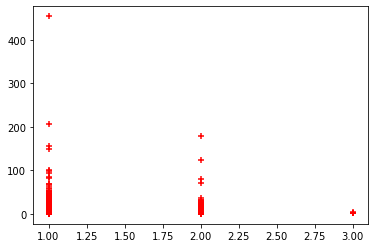

In [66]:
plt.scatter(data_clean.m1_mission_difficulty, data_clean.m1_lifetime_played_runs, marker = '+', color = 'red')

In [67]:
data_clean.m1_lifetime_played_runs.max()

454.0

In [68]:
# number of players who played different missions for m1

data_clean.m1_mission_id.value_counts()

Mission115    161525
Mission113     81876
Mission94      12972
Mission109     10908
Mission122       498
Mission11         38
Dynamic6          18
Dynamic5          16
Dynamic146        11
Mission3          10
Dynamic329         8
Mission114         8
Dynamic38          8
Dynamic45          8
Dynamic143         8
Dynamic82          7
Dynamic147         7
Dynamic148         7
Dynamic86          7
Mission6           6
Dynamic328         5
Dynamic37          5
Dynamic56          5
Dynamic369         5
Dynamic13          5
Dynamic156         5
Dynamic319         5
Dynamic290         4
Dynamic81          4
Dynamic18          4
Dynamic65          4
Dynamic140         4
Dynamic280         4
Dynamic237         3
Dynamic292         3
Dynamic119         3
Dynamic300         3
Dynamic311         3
Dynamic366         3
Dynamic370         3
Dynamic291         3
Dynamic155         3
Dynamic1           3
Dynamic58          3
Dynamic177         3
Dynamic363         3
Dynamic296         3
Dynamic64    

In [69]:
# mission = data_clean[(data_clean.filter(like = 'mission_id',axis=1))&(data_clean.filter(like = 'mission_difficulty',axis=1))]
# mission = data_clean.iloc[:, [1,2,3]]
# mission = data_clean.filter(like='mission_id',axis=1)

# source: https://cmdlinetips.com/2021/03/pandas-filter-select-columns-and-rows-by-labels-in-a-dataframe/
mission = data_clean.filter(regex='mission_id$',axis=1)
mission.columns = ['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10']
mission
difficulty = data_clean.filter(like='mission_difficulty',axis=1)
difficulty.columns = ['m1_dif','m2_dif','m3_dif','m4_dif','m5_dif','m6_dif','m7_dif','m8_dif','m9','m10']
difficulty

# mis_dif = data_clean.loc[:, (data_clean.columns.str.contains('mission_difficulty'))& (data_clean.columns.str.contains('m1_mission_id'))]
# mis_dif
#&(data_clean['m1_mission_id'])

m1_dif  m2_dif  m3_dif  m4_dif  m5_dif  m6_dif  m7_dif  m8_dif   m9  \
0          2.0     1.0     1.0     1.0     1.0     1.0     2.0     1.0  2.0   
1          1.0     1.0     1.0     1.0     1.0     1.0     2.0     2.0  2.0   
2          1.0     1.0     1.0     1.0     1.0     1.0     2.0     2.0  2.0   
3          2.0     1.0     1.0     1.0     1.0     1.0     2.0     2.0  2.0   
4          1.0     1.0     1.0     1.0     1.0     1.0     2.0     2.0  2.0   
...        ...     ...     ...     ...     ...     ...     ...     ...  ...   
268181     1.0     1.0     1.0     1.0     1.0     1.0     1.0     2.0  2.0   
268182     1.0     1.0     1.0     1.0     1.0     1.0     2.0     2.0  1.0   
268183     1.0     1.0     1.0     1.0     1.0     1.0     1.0     2.0  1.0   
268184     1.0     1.0     1.0     1.0     1.0     1.0     2.0     2.0  2.0   
268185     1.0     1.0     1.0     1.0     1.0     1.0     1.0     2.0  2.0   

        m10  
0         2  
1         2  
2         1  
3         1  
4         1  
...     ...  
268181    2  
268182    2  
268183    2  
268184    1  
268185    1  

[268186 rows x 10 columns]

In [70]:
mis_dif = pd.concat([mission,difficulty], axis =1)#.reset_index(drop=True)
mis_dif

m1          m2          m3          m4          m5  \
0        Mission94  Mission109  Mission115  Mission114    Mission3   
1       Mission113  Mission109  Mission115    Mission3  Mission114   
2       Mission109  Mission113  Mission115   Mission11    Mission3   
3        Mission94  Mission115  Mission109    Mission3  Mission114   
4       Mission115  Mission113  Mission109  Mission114    Mission3   
...            ...         ...         ...         ...         ...   
268181  Mission113  Mission109   Mission11  Mission115    Mission6   
268182  Mission115  Mission109  Mission113   Mission11    Mission3   
268183  Mission115  Mission113  Mission109  Mission114   Mission11   
268184  Mission113  Mission109  Mission115    Mission3   Mission11   
268185  Mission115  Mission109  Mission113  Mission114    Mission3   

                m6          m7         m8         m9         m10  m1_dif  \
0        Mission11   Mission19   Mission6  Mission86   Mission12     2.0   
1         Mission3   Mission19  Mission86  Mission19   Mission86     1.0   
2         Mission6   Mission19  Mission86  Mission12  Mission114     1.0   
3        Mission11   Mission19  Mission12  Mission86   Mission10     2.0   
4        Mission11   Mission19  Mission86  Mission12    Mission6     1.0   
...            ...         ...        ...        ...         ...     ...   
268181    Mission3  Mission114  Mission19  Mission12   Mission86     1.0   
268182  Mission114   Mission19  Mission12   Mission6   Mission86     1.0   
268183    Mission3    Mission6  Mission86  Mission10   Mission12     1.0   
268184  Mission114   Mission12  Mission19  Mission86    Mission6     1.0   
268185    Mission6   Mission11  Mission19  Mission86   Mission10     1.0   

        m2_dif  m3_dif  m4_dif  m5_dif  m6_dif  m7_dif  m8_dif   m9  m10  
0          1.0     1.0     1.0     1.0     1.0     2.0     1.0  2.0    2  
1          1.0     1.0     1.0     1.0     1.0     2.0     2.0  2.0    2  
2          1.0     1.0     1.0     1.0     1.0     2.0     2.0  2.0    1  
3          1.0     1.0     1.0     1.0     1.0     2.0     2.0  2.0    1  
4          1.0     1.0     1.0     1.0     1.0     2.0     2.0  2.0    1  
...        ...     ...     ...     ...     ...     ...     ...  ...  ...  
268181     1.0     1.0     1.0     1.0     1.0     1.0     2.0  2.0    2  
268182     1.0     1.0     1.0     1.0     1.0     2.0     2.0  1.0    2  
268183     1.0     1.0     1.0     1.0     1.0     1.0     2.0  1.0    2  
268184     1.0     1.0     1.0     1.0     1.0     2.0     2.0  2.0    1  
268185     1.0     1.0     1.0     1.0     1.0     1.0     2.0  2.0    1  

[268186 rows x 20 columns]

In [71]:
# pd.unique(mis_dif.values.ravel('K'))

In [72]:
# Number of unique missions for all 10 missions

# mis_dif['m1_mission_id'].nunique()
mission_lst = []
cols = list(mission.columns)
for cols in mission:
    mission_lst.append(mission[cols].nunique())
    print(mission[cols].nunique())

143
126
117
96
91
80
81
67
71
65


In [73]:
mission_lst

[143, 126, 117, 96, 91, 80, 81, 67, 71, 65]

#### Number of different missions for each Mission #

<BarContainer object of 10 artists>

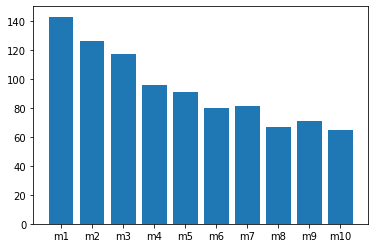

In [74]:
height = mission_lst
bars = mission.columns
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.bar(y_pos, height)

<AxesSubplot:xlabel='m1_dif', ylabel='count'>

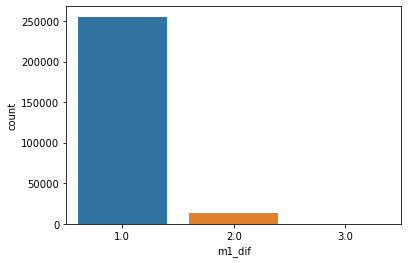

In [75]:
sb.countplot(x='m1_dif',data=difficulty)

In [76]:
difficulty.m1_dif.value_counts()

1.0    255113
2.0     13069
3.0         4
Name: m1_dif, dtype: int64

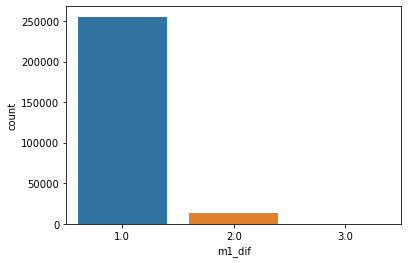

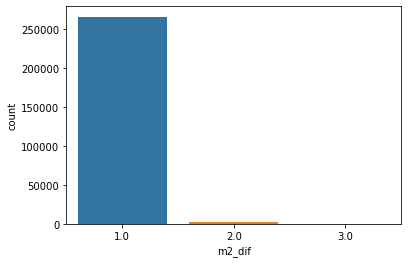

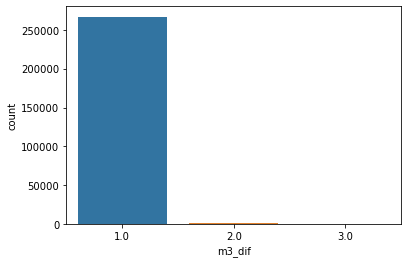

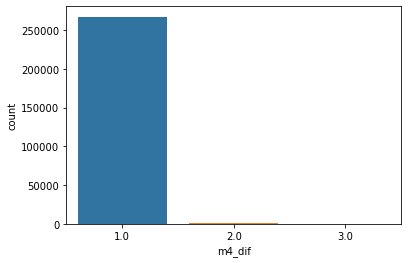

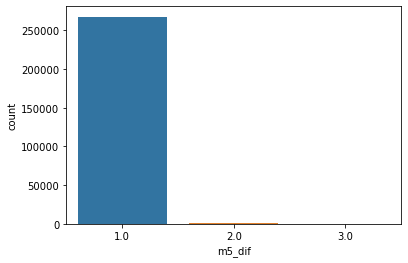

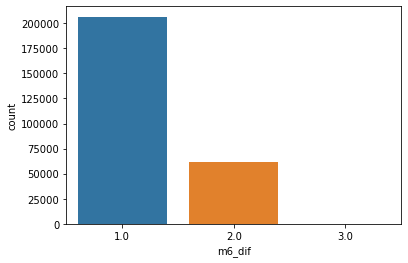

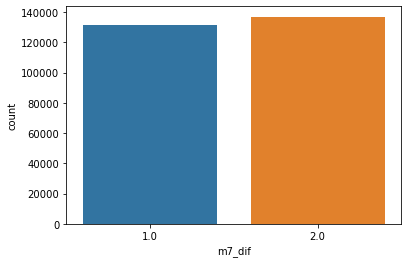

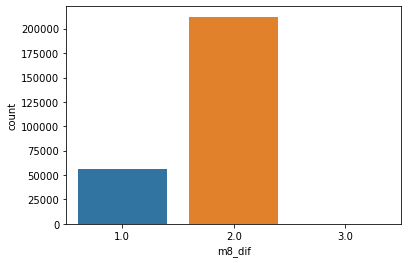

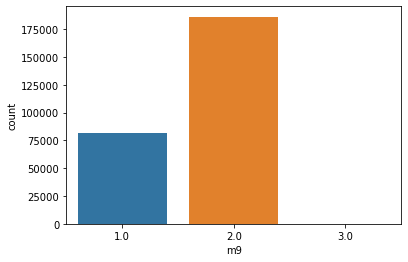

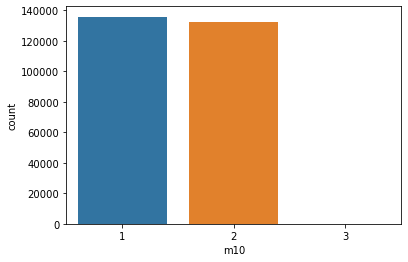

In [77]:

for i in range(len(difficulty.columns)):
    sb.countplot(x=difficulty.iloc[:,i],data=difficulty)
    plt.show()

<BarContainer object of 10 artists>

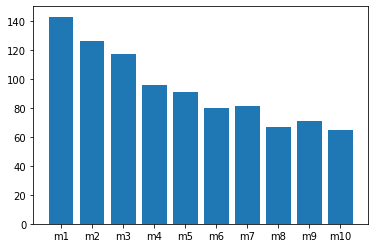

In [78]:
height = mission_lst
bars = mission.columns
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.bar(y_pos, height)

In [79]:
# plt.scatter(mission_lst df.COLUMN)

In [80]:
data_clean.describe().T

count           mean           std    min  \
m1_mission_completed          268186.0       3.000000  0.000000e+00    3.0   
m1_mission_difficulty         268186.0       1.048761  2.154375e-01    1.0   
m1_mission_stars_collected    268186.0       2.826788  3.497938e+00    0.0   
m1_day_auto_increment         268186.0     596.809159  7.723777e+04   -1.0   
m1_lifetime_played_runs       268186.0       1.221533  1.552111e+00    0.0   
m1_max_run_distance           268186.0    1473.709377  5.360221e+02    0.0   
m1_total_purchases_virtual    268186.0   40568.458465  2.895691e+06    0.0   
m1_total_ads_watched          268186.0       0.072211  6.878260e-01    0.0   
m1_total_purchases_real       268186.0       0.012032  4.656130e-01    0.0   
m1_days_played_in_month       268186.0     559.468276  7.478529e+04   -1.0   
m1_virtual_currency_balance   268186.0  463654.197408  2.105269e+07    0.0   
m2_mission_completed          268186.0       4.000000  0.000000e+00    4.0   
m2_mission_difficulty         268186.0       1.010590  1.024692e-01    1.0   
m2_mission_stars_collected    268186.0       3.387030  3.483399e+00    0.0   
m2_day_auto_increment         268186.0     634.137699  7.961473e+04   -1.0   
m2_lifetime_played_runs       268186.0       1.745408  2.203950e+00    0.0   
m2_max_run_distance           268186.0    1556.793479  5.381452e+02    0.0   
m2_total_purchases_virtual    268186.0   42293.155142  2.903022e+06    0.0   
m2_total_ads_watched          268186.0       0.216156  9.648510e-01    0.0   
m2_total_purchases_real       268186.0       0.012928  4.959673e-01    0.0   
m2_days_played_in_month       268186.0     596.785809  7.723777e+04   -1.0   
m2_virtual_currency_balance   268186.0  481104.528119  2.153427e+07    0.0   
m3_mission_completed          268186.0       5.000000  0.000000e+00    5.0   
m3_mission_difficulty         268186.0       1.004594  6.778726e-02    1.0   
m3_mission_stars_collected    268186.0       4.101381  3.543367e+00    0.0   
m3_day_auto_increment         268186.0     634.179178  7.961473e+04   -1.0   
m3_lifetime_played_runs       268186.0       2.250330  2.586282e+00    0.0   
m3_max_run_distance           268186.0    1655.687101  5.852760e+02    0.0   
m3_total_purchases_virtual    268186.0   43813.674509  2.909954e+06    0.0   
m3_total_ads_watched          268186.0       0.395170  1.223739e+00    0.0   
m3_total_purchases_real       268186.0       0.013866  5.074583e-01    0.0   
m3_days_played_in_month       268186.0     596.816325  7.723777e+04   -1.0   
m3_virtual_currency_balance   268186.0  493946.981696  2.196235e+07    0.0   
m4_mission_completed          268186.0       6.000000  0.000000e+00    6.0   
m4_mission_difficulty         268186.0       1.003192  5.653807e-02    1.0   
m4_mission_stars_collected    268186.0       5.423848  3.524898e+00    1.0   
m4_day_auto_increment         268186.0     671.554197  8.192272e+04   -1.0   
m4_lifetime_played_runs       268186.0       3.175718  3.484209e+00    0.0   
m4_max_run_distance           268186.0    1981.358565  8.101201e+02    0.0   
m4_total_purchases_virtual    268186.0   48164.481479  3.046229e+06    0.0   
m4_total_ads_watched          268186.0       0.853251  1.816902e+00    0.0   
m4_total_purchases_real       268186.0       0.016250  5.341452e-01    0.0   
m4_days_played_in_month       268186.0     559.595684  7.478529e+04   -1.0   
m4_virtual_currency_balance   268186.0  505915.508867  2.212545e+07    0.0   
m5_mission_completed          268186.0       7.000000  0.000000e+00    7.0   
m5_mission_difficulty         268186.0       1.002330  4.829604e-02    1.0   
m5_mission_stars_collected    268186.0       6.430996  3.519825e+00    2.0   
m5_day_auto_increment         268186.0     671.656720  8.192272e+04   -1.0   
m5_lifetime_played_runs       268186.0       4.259644  4.487133e+00    1.0   
m5_max_run_distance           268186.0    2278.181270  9.779913e+02    0.0   
m5_total_purchases_virtual    268186.0   49777.641793  

### Formatting the dataset

In [81]:
target = data_clean[['target_max_day_played']]
target

target_max_day_played
0                           4
1                           4
2                           2
3                           2
4                           5
...                       ...
268181                      9
268182                     13
268183                      3
268184                      4
268185                      5

[268186 rows x 1 columns]

In [82]:
module1 = data_clean.filter(like='m1_').reset_index()
module2 = data_clean.filter(like='m2_').reset_index()
module3 = data_clean.filter(like='m3_').reset_index()
module4 = data_clean.filter(like='m4_').reset_index()
module5 = data_clean.filter(like='m5_').reset_index()
module6 = data_clean.filter(like='m6_').reset_index()
module7 = data_clean.filter(like='m7_').reset_index()
module8 = data_clean.filter(like='m8_').reset_index()
module9 = data_clean.filter(like='m9_').reset_index()
module10 = data_clean.filter(like='m10_').reset_index()

In [83]:
module1 = pd.concat([module1,target],axis=1)
module2 = pd.concat([module2,target],axis=1)
module3 = pd.concat([module3,target],axis=1)
module4 = pd.concat([module4,target],axis=1)
module5 = pd.concat([module5,target],axis=1)
module6 = pd.concat([module6,target],axis=1)
module7 = pd.concat([module7,target],axis=1)
module8 = pd.concat([module8,target],axis=1)
module9 = pd.concat([module9,target],axis=1)
module10 = pd.concat([module10,target],axis=1)

In [84]:
module1

index  m1_mission_completed m1_mission_id  m1_mission_difficulty  \
0            0                   3.0     Mission94                    2.0   
1            1                   3.0    Mission113                    1.0   
2            2                   3.0    Mission109                    1.0   
3            3                   3.0     Mission94                    2.0   
4            4                   3.0    Mission115                    1.0   
...        ...                   ...           ...                    ...   
268181  268181                   3.0    Mission113                    1.0   
268182  268182                   3.0    Mission115                    1.0   
268183  268183                   3.0    Mission115                    1.0   
268184  268184                   3.0    Mission113                    1.0   
268185  268185                   3.0    Mission115                    1.0   

        m1_mission_stars_collected  m1_day_auto_increment  \
0                              3.0                    0.0   
1                              3.0                    0.0   
2                              3.0                    1.0   
3                              1.0                    1.0   
4                              3.0                    0.0   
...                            ...                    ...   
268181                         1.0                    0.0   
268182                         3.0                    0.0   
268183                         3.0                    0.0   
268184                         3.0                    0.0   
268185                         3.0                    0.0   

        m1_lifetime_played_runs  m1_max_run_distance  \
0                           2.0               1763.0   
1                           1.0               1653.0   
2                           2.0               1203.0   
3                           2.0               1046.0   
4                           1.0               1250.0   
...                         ...                  ...   
268181                      1.0               1373.0   
268182                      1.0               3046.0   
268183                      1.0               1019.0   
268184                      1.0               2206.0   
268185                      1.0               1380.0   

        m1_total_purchases_virtual  m1_total_ads_watched  \
0                           2000.0                   0.0   
1                              0.0                   0.0   
2                              0.0                   0.0   
3                           1000.0                   0.0   
4                              0.0                   0.0   
...                            ...                   ...   
268181                      1500.0                   0.0   
268182                         0.0                   0.0   
268183                      3000.0                   0.0   
268184                      5000.0                   0.0   
268185                         0.0                   0.0   

        m1_total_purchases_real  m1_geo_country  m1_days_played_in_month  \
0                           0.0        Honduras                      0.0   
1                           0.0         Belgium                      0.0   
2                           0.0         Vietnam                      1.0   
3                           0.0          Taiwan                      1.0   
4                           0.0      Bangladesh                      0.0   
...                         ...             ...                      ...   
268181                      0.0  United Kingdom                      0.0   
268182                      0.0  United Kingdom                      0.0   
268183                      0.0  United Kingdom                      0.0   
268184                      0.0  United Kingdom                      0.0   
268185                      0.0  United Kingdom                      0.0   

        m1_virtual_currency_balance         

In [85]:
module1.columns=module1.columns.str.lstrip('m1')
module1.columns=module1.columns.str.lstrip('_')
module2.columns=module2.columns.str.lstrip('m2')
module2.columns=module2.columns.str.lstrip('_')
module3.columns=module3.columns.str.lstrip('m3')
module3.columns=module3.columns.str.lstrip('_')
module4.columns=module4.columns.str.lstrip('m4')
module4.columns=module4.columns.str.lstrip('_')
module5.columns=module5.columns.str.lstrip('m5')
module5.columns=module5.columns.str.lstrip('_')
module6.columns=module6.columns.str.lstrip('m6')
module6.columns=module6.columns.str.lstrip('_')
module7.columns=module7.columns.str.lstrip('m7')
module7.columns=module7.columns.str.lstrip('_')
module8.columns=module8.columns.str.lstrip('m8')
module8.columns=module8.columns.str.lstrip('_')
module9.columns=module9.columns.str.lstrip('m9')
module9.columns=module9.columns.str.lstrip('_')
module10.columns=module10.columns.str.lstrip('m10')
module10.columns=module10.columns.str.lstrip('_')

In [86]:
module1

index  mission_completed  mission_id  mission_difficulty  \
0            0                3.0   Mission94                 2.0   
1            1                3.0  Mission113                 1.0   
2            2                3.0  Mission109                 1.0   
3            3                3.0   Mission94                 2.0   
4            4                3.0  Mission115                 1.0   
...        ...                ...         ...                 ...   
268181  268181                3.0  Mission113                 1.0   
268182  268182                3.0  Mission115                 1.0   
268183  268183                3.0  Mission115                 1.0   
268184  268184                3.0  Mission113                 1.0   
268185  268185                3.0  Mission115                 1.0   

        mission_stars_collected  day_auto_increment  lifetime_played_runs  \
0                           3.0                 0.0                   2.0   
1                           3.0                 0.0                   1.0   
2                           3.0                 1.0                   2.0   
3                           1.0                 1.0                   2.0   
4                           3.0                 0.0                   1.0   
...                         ...                 ...                   ...   
268181                      1.0                 0.0                   1.0   
268182                      3.0                 0.0                   1.0   
268183                      3.0                 0.0                   1.0   
268184                      3.0                 0.0                   1.0   
268185                      3.0                 0.0                   1.0   

        max_run_distance  total_purchases_virtual  total_ads_watched  \
0                 1763.0                   2000.0                0.0   
1                 1653.0                      0.0                0.0   
2                 1203.0                      0.0                0.0   
3                 1046.0                   1000.0                0.0   
4                 1250.0                      0.0                0.0   
...                  ...                      ...                ...   
268181            1373.0                   1500.0                0.0   
268182            3046.0                      0.0                0.0   
268183            1019.0                   3000.0                0.0   
268184            2206.0                   5000.0                0.0   
268185            1380.0                      0.0                0.0   

        total_purchases_real     geo_country  days_played_in_month  \
0                        0.0        Honduras                   0.0   
1                        0.0         Belgium                   0.0   
2                        0.0         Vietnam                   1.0   
3                        0.0          Taiwan                   1.0   
4                        0.0      Bangladesh                   0.0   
...                      ...             ...                   ...   
268181                   0.0  United Kingdom                   0.0   
268182                   0.0  United Kingdom                   0.0   
268183                   0.0  United Kingdom                   0.0   
268184                   0.0  United Kingdom                   0.0   
268185                   0.0  United Kingdom                   0.0   

        virtual_currency_balance             event_timestamp  \
0                         5000.0  2022-03-02 15:46:04.025000   
1                         5644.0  2022-02-04 21:16:01.131000   
2                         5285.0  2022-02-19 04:23:19.464000   
3                         4343.0  2022-02-25 04:49:05.706000   
4                         5482.0  2022-02-14 15:37:03.106000   
...                          ...                         ...   
268181                    2799.0     2022-02-21 05:21:46.025   
268182                    5786.0     

In [87]:
module1 = module1.rename(columns={'index': 'pseudo_id'})
module2 = module2.rename(columns={'index': 'pseudo_id'})
module3 = module3.rename(columns={'index': 'pseudo_id'})
module4 = module4.rename(columns={'index': 'pseudo_id'})
module5 = module5.rename(columns={'index': 'pseudo_id'})
module6 = module6.rename(columns={'index': 'pseudo_id'})
module7 = module7.rename(columns={'index': 'pseudo_id'})
module8 = module8.rename(columns={'index': 'pseudo_id'})
module9 = module9.rename(columns={'index': 'pseudo_id'})
module10 = module10.rename(columns={'index': 'pseudo_id'})

In [88]:
module1['module_played'] = 1

In [89]:
module1

pseudo_id  mission_completed  mission_id  mission_difficulty  \
0               0                3.0   Mission94                 2.0   
1               1                3.0  Mission113                 1.0   
2               2                3.0  Mission109                 1.0   
3               3                3.0   Mission94                 2.0   
4               4                3.0  Mission115                 1.0   
...           ...                ...         ...                 ...   
268181     268181                3.0  Mission113                 1.0   
268182     268182                3.0  Mission115                 1.0   
268183     268183                3.0  Mission115                 1.0   
268184     268184                3.0  Mission113                 1.0   
268185     268185                3.0  Mission115                 1.0   

        mission_stars_collected  day_auto_increment  lifetime_played_runs  \
0                           3.0                 0.0                   2.0   
1                           3.0                 0.0                   1.0   
2                           3.0                 1.0                   2.0   
3                           1.0                 1.0                   2.0   
4                           3.0                 0.0                   1.0   
...                         ...                 ...                   ...   
268181                      1.0                 0.0                   1.0   
268182                      3.0                 0.0                   1.0   
268183                      3.0                 0.0                   1.0   
268184                      3.0                 0.0                   1.0   
268185                      3.0                 0.0                   1.0   

        max_run_distance  total_purchases_virtual  total_ads_watched  \
0                 1763.0                   2000.0                0.0   
1                 1653.0                      0.0                0.0   
2                 1203.0                      0.0                0.0   
3                 1046.0                   1000.0                0.0   
4                 1250.0                      0.0                0.0   
...                  ...                      ...                ...   
268181            1373.0                   1500.0                0.0   
268182            3046.0                      0.0                0.0   
268183            1019.0                   3000.0                0.0   
268184            2206.0                   5000.0                0.0   
268185            1380.0                      0.0                0.0   

        total_purchases_real     geo_country  days_played_in_month  \
0                        0.0        Honduras                   0.0   
1                        0.0         Belgium                   0.0   
2                        0.0         Vietnam                   1.0   
3                        0.0          Taiwan                   1.0   
4                        0.0      Bangladesh                   0.0   
...                      ...             ...                   ...   
268181                   0.0  United Kingdom                   0.0   
268182                   0.0  United Kingdom                   0.0   
268183                   0.0  United Kingdom                   0.0   
268184                   0.0  United Kingdom                   0.0   
268185                   0.0  United Kingdom                   0.0   

        virtual_currency_balance             event_timestamp  \
0                         5000.0  2022-03-02 15:46:04.025000   
1                         5644.0  2022-02-04 21:16:01.131000   
2                         5285.0  2022-02-19 04:23:19.464000   
3                         4343.0  2022-02-25 04:49:05.706000   
4                         5482.0  2022-02-14 15:37:03.106000   
...                          ...                         ...   
268181                    2799.0     2022-02-21 05:21:46.025   


In [90]:
datasets = [module2,module3,module4,module5,module6,module7,module8,module9,module10]
x = 2
for i in datasets:
    i['module_played'] = x
    x += 1


In [91]:
module10

pseudo_id  mission_completed  mission_id  mission_difficulty  \
0               0                 12   Mission12                   2   
1               1                 12   Mission86                   2   
2               2                 12  Mission114                   1   
3               3                 12   Mission10                   1   
4               4                 12    Mission6                   1   
...           ...                ...         ...                 ...   
268181     268181                 12   Mission86                   2   
268182     268182                 12   Mission86                   2   
268183     268183                 12   Mission12                   2   
268184     268184                 12    Mission6                   1   
268185     268185                 12   Mission10                   1   

        mission_stars_collected  day_auto_increment  lifetime_played_runs  \
0                            14                 3.0                  23.0   
1                            15                 0.0                   5.0   
2                            15                 2.0                  14.0   
3                            15                 2.0                  24.0   
4                            15                 1.0                  29.0   
...                         ...                 ...                   ...   
268181                       14                 0.0                   8.0   
268182                       14                 1.0                   9.0   
268183                       13                 2.0                  24.0   
268184                       15                 0.0                  15.0   
268185                       14                 2.0                  21.0   

        max_run_distance  total_purchases_virtual  total_ads_watched  \
0                 2585.0                   8500.0                0.0   
1                 3790.0                      0.0                3.0   
2                 3581.0                  10000.0               10.0   
3                 3314.0                   5500.0                0.0   
4                 2538.0                  11500.0                0.0   
...                  ...                      ...                ...   
268181            2283.0                   5500.0                4.0   
268182            4082.0                   4000.0                6.0   
268183            3326.0                  12000.0                1.0   
268184            3485.0                   7000.0                0.0   
268185            4662.0                  21000.0               22.0   

        total_purchases_real     geo_country  days_played_in_month  \
0                        0.0        Honduras                   3.0   
1                        0.0         Belgium                   0.0   
2                        0.0         Vietnam                   2.0   
3                        0.0          Taiwan                   0.0   
4                        0.0      Bangladesh                   1.0   
...                      ...             ...                   ...   
268181                   0.0  United Kingdom                   0.0   
268182                   0.0  United Kingdom                   1.0   
268183                   0.0  United Kingdom                   2.0   
268184                   0.0  United Kingdom                   0.0   
268185                   0.0  United Kingdom                   2.0   

        virtual_currency_balance             event_timestamp  \
0                         2820.0  2022-03-14 02:05:01.562000   
1                        10179.0  2022-02-04 21:26:53.862000   
2                           57.0  2022-02-20 03:50:41.292000   
3                         6634.0  2022-03-02 09:22:12.536000   
4                         3577.0  2022-02-15 17:16:44.864000   
...                          ...                         ...   
268181                    2624.0     2022-02-21 20:23:16.173   


In [92]:
dataset = pd.concat([module1, module2, module3, module4, module5, module6, module7, module8, module9, module10], axis =0).reset_index(drop=True)

In [93]:
dataset

pseudo_id  mission_completed  mission_id  mission_difficulty  \
0                0                3.0   Mission94                 2.0   
1                1                3.0  Mission113                 1.0   
2                2                3.0  Mission109                 1.0   
3                3                3.0   Mission94                 2.0   
4                4                3.0  Mission115                 1.0   
...            ...                ...         ...                 ...   
2681855     268181               12.0   Mission86                 2.0   
2681856     268182               12.0   Mission86                 2.0   
2681857     268183               12.0   Mission12                 2.0   
2681858     268184               12.0    Mission6                 1.0   
2681859     268185               12.0   Mission10                 1.0   

         mission_stars_collected  day_auto_increment  lifetime_played_runs  \
0                            3.0                 0.0                   2.0   
1                            3.0                 0.0                   1.0   
2                            3.0                 1.0                   2.0   
3                            1.0                 1.0                   2.0   
4                            3.0                 0.0                   1.0   
...                          ...                 ...                   ...   
2681855                     14.0                 0.0                   8.0   
2681856                     14.0                 1.0                   9.0   
2681857                     13.0                 2.0                  24.0   
2681858                     15.0                 0.0                  15.0   
2681859                     14.0                 2.0                  21.0   

         max_run_distance  total_purchases_virtual  total_ads_watched  \
0                  1763.0                   2000.0                0.0   
1                  1653.0                      0.0                0.0   
2                  1203.0                      0.0                0.0   
3                  1046.0                   1000.0                0.0   
4                  1250.0                      0.0                0.0   
...                   ...                      ...                ...   
2681855            2283.0                   5500.0                4.0   
2681856            4082.0                   4000.0                6.0   
2681857            3326.0                  12000.0                1.0   
2681858            3485.0                   7000.0                0.0   
2681859            4662.0                  21000.0               22.0   

         total_purchases_real     geo_country  days_played_in_month  \
0                         0.0        Honduras                   0.0   
1                         0.0         Belgium                   0.0   
2                         0.0         Vietnam                   1.0   
3                         0.0          Taiwan                   1.0   
4                         0.0      Bangladesh                   0.0   
...                       ...             ...                   ...   
2681855                   0.0  United Kingdom                   0.0   
2681856                   0.0  United Kingdom                   1.0   
2681857                   0.0  United Kingdom                   2.0   
2681858                   0.0  United Kingdom                   0.0   
2681859                   0.0  United Kingdom                   2.0   

         virtual_currency_balance             event_timestamp  \
0                          5000.0  2022-03-02 15:46:04.025000   
1                          5644.0  2022-02-04 21:16:01.131000   
2                          5285.0  2022-02-19 04:23:19.464000   
3                          4343.0  2022-02-25 04:49:05.706000   
4                          5482.0  2022-02-14 15:37:03.106000   
...                           ...                         ...   
2681855   

In [94]:
dataset['module_played'].value_counts(dropna=False)

1     268186
2     268186
3     268186
4     268186
5     268186
6     268186
7     268186
8     268186
9     268186
10    268186
Name: module_played, dtype: int64

In [95]:
clean_data = dataset.sort_values(by=['pseudo_id','module_played']).reset_index(drop=True)
clean_data.head(20)

pseudo_id  mission_completed  mission_id  mission_difficulty  \
0           0                3.0   Mission94                 2.0   
1           0                4.0  Mission109                 1.0   
2           0                5.0  Mission115                 1.0   
3           0                6.0  Mission114                 1.0   
4           0                7.0    Mission3                 1.0   
5           0                8.0   Mission11                 1.0   
6           0                9.0   Mission19                 2.0   
7           0               10.0    Mission6                 1.0   
8           0               11.0   Mission86                 2.0   
9           0               12.0   Mission12                 2.0   
10          1                3.0  Mission113                 1.0   
11          1                4.0  Mission109                 1.0   
12          1                5.0  Mission115                 1.0   
13          1                6.0    Mission3                 1.0   
14          1                7.0  Mission114                 1.0   
15          1                8.0    Mission3                 1.0   
16          1                9.0   Mission19                 2.0   
17          1               10.0   Mission86                 2.0   
18          1               11.0   Mission19                 2.0   
19          1               12.0   Mission86                 2.0   

    mission_stars_collected  day_auto_increment  lifetime_played_runs  \
0                       3.0                 0.0                   2.0   
1                       4.0                 0.0                   3.0   
2                       5.0                 0.0                   8.0   
3                       6.0                 2.0                   9.0   
4                       7.0                 2.0                  12.0   
5                       8.0                 3.0                  19.0   
6                       8.0                 3.0                  19.0   
7                      11.0                 3.0                  20.0   
8                      12.0                 3.0                  21.0   
9                      14.0                 3.0                  23.0   
10                      3.0                 0.0                   1.0   
11                      3.0                 0.0                   1.0   
12                      3.0                 0.0                   1.0   
13                      6.0                 0.0                   2.0   
14                      6.0                 0.0                   2.0   
15                      8.0                 0.0                   3.0   
16                      9.0                 0.0                   3.0   
17                     11.0                 0.0                   4.0   
18                     11.0                 0.0                   4.0   
19                     15.0                 0.0                   5.0   

    max_run_distance  total_purchases_virtual  total_ads_watched  \
0             1763.0                   2000.0                0.0   
1             2266.0                   2000.0                0.0   
2             2266.0                   3500.0                0.0   
3             2266.0                   3500.0                0.0   
4             2266.0                   7000.0                0.0   
5             2585.0                   7000.0                0.0   
6             2585.0                   7000.0                0.0   
7             2585.0                   7000.0                0.0   
8             2585.0                   7000.0                0.0   
9             2585.0                   8500.0                0.0   
10            1653.0                      0.0                0.0   
11            1653.0                      0.0                0.0   
12            1653.0                      0.0                0.0   
13            3790.0                      0.0                0.0   
14            3790.0 

In [96]:
clean_data.dtypes

pseudo_id                     int64
mission_completed           float64
mission_id                   object
mission_difficulty          float64
mission_stars_collected     float64
day_auto_increment          float64
lifetime_played_runs        float64
max_run_distance            float64
total_purchases_virtual     float64
total_ads_watched           float64
total_purchases_real        float64
geo_country                  object
days_played_in_month        float64
virtual_currency_balance    float64
event_timestamp              object
target_max_day_played         int64
module_played                 int64
dtype: object

In [97]:
clean_data['mission_id'] = clean_data['mission_id']. str. replace(r'\D', '')

C:\Users\Romeo\AppData\Local\Temp/ipykernel_15756/294239335.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_data['mission_id'] = clean_data['mission_id']. str. replace(r'\D', '')


In [98]:
clean_data.mission_completed.value_counts()

3.0     268186
4.0     268186
5.0     268186
6.0     268186
7.0     268186
8.0     268186
9.0     268186
10.0    268186
11.0    268186
12.0    268186
Name: mission_completed, dtype: int64

In [99]:
clean_data.mission_difficulty.value_counts()

1.0    1933877
2.0     747958
3.0         25
Name: mission_difficulty, dtype: int64

In [100]:
# clean_data.mission_stars_collected.value_counts()

In [101]:
clean_data.day_auto_increment.value_counts()

 0.0           1682678
 1.0            610012
 2.0            202287
 3.0             85864
 4.0             41240
 5.0             22053
 6.0             11673
-1.0              7285
 7.0              6781
 8.0              3999
 9.0              2579
 10.0             1664
 11.0             1041
 12.0              748
 13.0              557
 14.0              292
 15.0              222
 16.0              178
 9999999.0         159
 17.0              107
 18.0               83
 19.0               65
 20.0               55
 21.0               45
 22.0               34
 23.0               31
 25.0               21
 24.0               21
 10000000.0         10
 27.0               10
 10000001.0          8
 26.0                7
 50.0                6
 28.0                6
 37.0                5
 31.0                4
 36.0                4
 32.0                3
 30.0                3
 33.0                2
 34.0                2
 38.0                2
 41.0                2
 35.0      

In [102]:
clean_data.isna().sum().sum()

0

#### Some of the day_auto_increments seem to be far fetched. Will take a closer look at them after converting float columns to int

In [103]:
# clean_data.lifetime_played_runs.value_counts()

In [104]:
# clean_data.max_run_distance.value_counts().head(200)

In [105]:
# clean_data.total_purchases_virtual.value_counts().head(200)

In [106]:
# clean_data.total_ads_watched.value_counts()

In [107]:
# clean_data.total_purchases_real.value_counts().head(200) # Keep as float

In [108]:
# clean_data.days_played_in_month.value_counts()

# Also need to look into these odd numbers. Likely to drop this column as I don't see much use of it at this point

In [109]:
# clean_data.virtual_currency_balance.value_counts().head(200)

In [110]:
cols = ['mission_completed','mission_difficulty','mission_stars_collected','day_auto_increment','lifetime_played_runs',
       'max_run_distance','total_purchases_virtual','total_ads_watched','days_played_in_month','virtual_currency_balance']

for i in cols:
    clean_data[i] = clean_data[i].astype(int)

In [111]:
clean_data['event_timestamp'] = clean_data['event_timestamp'].astype('datetime64[ns]')

In [112]:
clean_data.dtypes

pseudo_id                            int64
mission_completed                    int32
mission_id                          object
mission_difficulty                   int32
mission_stars_collected              int32
day_auto_increment                   int32
lifetime_played_runs                 int32
max_run_distance                     int32
total_purchases_virtual              int32
total_ads_watched                    int32
total_purchases_real               float64
geo_country                         object
days_played_in_month                 int32
virtual_currency_balance             int32
event_timestamp             datetime64[ns]
target_max_day_played                int64
module_played                        int64
dtype: object

In [113]:
clean_data.describe().T

count           mean           std  min  \
pseudo_id                 2681860.0  134092.500000  7.741864e+04  0.0   
mission_completed         2681860.0       7.500000  2.872282e+00  3.0   
mission_difficulty        2681860.0       1.278914  4.484860e-01  1.0   
mission_stars_collected   2681860.0       7.509153  5.042386e+00  0.0   
day_auto_increment        2681860.0     660.652942  8.123707e+04 -1.0   
lifetime_played_runs      2681860.0       6.167133  7.923101e+00  0.0   
max_run_distance          2681860.0    2387.230231  1.197193e+03  0.0   
total_purchases_virtual   2681860.0   51715.275605  3.310990e+06  0.0   
total_ads_watched         2681860.0       2.431064  4.997032e+00  0.0   
total_purchases_real      2681860.0       0.022824  6.211079e-01  0.0   
days_played_in_month      2681860.0     593.358860  7.699591e+04 -1.0   
virtual_currency_balance  2681860.0  499017.507882  2.186983e+07  0.0   
target_max_day_played     2681860.0     789.469667  8.848596e+04  0.0   
module_played             2681860.0       5.500000  2.872282e+00  1.0   

                              25%       50%       75%           max  
pseudo_id                 67046.0  134092.5  201139.0  2.681850e+05  
mission_completed             5.0       7.5      10.0  1.200000e+01  
mission_difficulty            1.0       1.0       2.0  3.000000e+00  
mission_stars_collected       4.0       7.0      11.0  1.772000e+03  
day_auto_increment            0.0       0.0       1.0  1.000000e+07  
lifetime_played_runs          2.0       4.0       8.0  6.320000e+02  
max_run_distance           1502.0    2135.0    2906.0  5.788000e+04  
total_purchases_virtual       0.0     500.0    4000.0  1.245420e+09  
total_ads_watched             0.0       0.0       3.0  2.390000e+02  
total_purchases_real          0.0       0.0       0.0  1.339300e+02  
days_played_in_month          0.0       0.0       1.0  9.999999e+06  
virtual_currency_balance   4017.0    5649.0    6995.0  2.146000e+09  
target_max_day_played         2.0       4.0       8.0  1.000000e+07  
module_played                 3.0       5.5       8.0  1.000000e+01

#### Now back to look at those outliers for day_auto_increment & days_played_in_month

In [114]:
# clean_data[clean_data.day_auto_increment == 10000000.0]
clean_data[clean_data.pseudo_id == 73]

pseudo_id  mission_completed mission_id  mission_difficulty  \
730         73                  3        113                   1   
731         73                  4        109                   1   
732         73                  5         11                   1   
733         73                  6        114                   1   
734         73                  7        115                   1   
735         73                  8          6                   1   
736         73                  9         12                   2   
737         73                 10          3                   1   
738         73                 11         19                   2   
739         73                 12         86                   2   

     mission_stars_collected  day_auto_increment  lifetime_played_runs  \
730                        3                   0                     1   
731                        3                   0                     1   
732                        5                   0                     2   
733                        6                   0                     2   
734                        7                   0                     2   
735                        8                   0                     2   
736                        9                   0                     2   
737                       11                   0                     3   
738                       11                   0                     3   
739                       14            10000000                     4   

     max_run_distance  total_purchases_virtual  total_ads_watched  \
730              1047                     3000                  0   
731              1047                     3000                  0   
732              1212                     3000                  0   
733              1212                     3000                  0   
734              1212                     3000                  0   
735              1212                     3000                  0   
736              1212                     3000                  0   
737              1212                     3000                  0   
738              1212                     3000                  0   
739              1729                    18000                  0   

     total_purchases_real geo_country  days_played_in_month  \
730                   0.0       China                     0   
731                   0.0       China                     0   
732                   0.0       China                     0   
733                   0.0       China                     0   
734                   0.0       China                     0   
735                   0.0       China                     0   
736                   0.0       China                     0   
737                   0.0       China                     0   
738                   0.0       China                     0   
739                   0.0       China                     0   

     virtual_currency_balance         event_timestamp  target_max_day_played  \
730                      2563 2022-02-15 02:45:52.165               10000000   
731                      2563 2022-02-15 02:45:55.044               10000000   
732                      2159 2022-02-15 02:46:22.863               10000000   
733                      2059 2022-02-15 02:46:30.756               10000000   
734                      1559 2022-02-15 02:46:33.409               10000000   
735                      1059 2022-02-15 02:46:36.375               10000000   
736                       659 2022-02-15 02:46:44.225               10000000   
737                       659 2022-02-15 02:47:50.402               10000000   
738                       659 2022-02-15 02:47:58.163               10000000   
739                         0 2022-02-15 02:50:43.381               10000000   

     module_played  
730              1  
731              2  
732              3  
733              4  
7

In [115]:
clean_data[clean_data.day_auto_increment == -1]
clean_data[clean_data.pseudo_id == 255]

pseudo_id  mission_completed mission_id  mission_difficulty  \
2550        255                  3        115                   1   
2551        255                  4        113                   1   
2552        255                  5        115                   1   
2553        255                  6          3                   1   
2554        255                  7          6                   1   
2555        255                  8        114                   1   
2556        255                  9         19                   2   
2557        255                 10         86                   2   
2558        255                 11         86                   2   
2559        255                 12          6                   1   

      mission_stars_collected  day_auto_increment  lifetime_played_runs  \
2550                        3                   2                     1   
2551                        3                   2                     1   
2552                        5                   2                     3   
2553                        6                   2                     3   
2554                        7                   3                     4   
2555                        8                   5                     6   
2556                        9                   7                     7   
2557                       11                   7                    22   
2558                       13                  -1                    23   
2559                       13                  -1                    23   

      max_run_distance  total_purchases_virtual  total_ads_watched  \
2550              2127                        0                  0   
2551              2127                        0                  0   
2552              2127                        0                  0   
2553              2127                        0                  0   
2554              2127                        0                  0   
2555              2571                     1500                  1   
2556              2781                     1500                  2   
2557              2781                     6000                 12   
2558              2781                     6000                 13   
2559              2781                     6000                 13   

      total_purchases_real geo_country  days_played_in_month  \
2550                   0.0     Denmark                     2   
2551                   0.0     Denmark                     2   
2552                   0.0     Denmark                     2   
2553                   0.0     Denmark                     2   
2554                   0.0     Denmark                     3   
2555                   0.0     Denmark                     5   
2556                   0.0     Denmark                     1   
2557                   0.0     Denmark                     1   
2558                   0.0     Denmark                    -1   
2559                   0.0     Denmark                    -1   

      virtual_currency_balance         event_timestamp  target_max_day_played  \
2550                      6018 2022-04-07 12:35:32.201                      7   
2551                      6018 2022-04-07 12:35:58.717                      7   
2552                      6348 2022-04-07 12:38:14.215                      7   
2553                      6531 2022-04-07 12:38:38.118                      7   
2554                      7776 2022-04-21 17:44:25.875                      7   
2555                      8653 2022-04-30 16:53:12.244                      7   
2556                     14020 2022-05-03 13:42:50.457                      7   
2557                     14776 2022-05-03 13:43:43.078                      7   
2558                      6305 2022-03-09 09:48:33.011                      7   
2559                      6305 2022-03-09 09:48:41.155                      7   

      module_played  
2550              1  
2551    

#### These seem to be errors in the data so I will drop these outliers

In [116]:
clean_data.shape

(2681860, 17)

In [117]:
pseudo_to_drop = []
pseudo_to_drop = list(clean_data['pseudo_id'][(clean_data['day_auto_increment'] == 10000000) |
                                         (clean_data['day_auto_increment'] == -1) |
                                         (clean_data['days_played_in_month'] == 9999999) |
                                         (clean_data['days_played_in_month'] == -1) |
                                         (clean_data['day_auto_increment'] == 10000001)])


In [118]:
cleaned_data = clean_data[~clean_data['pseudo_id'].isin(pseudo_to_drop)]

In [119]:
cleaned_data.reset_index(drop=True)

pseudo_id  mission_completed mission_id  mission_difficulty  \
0                0                  3         94                   2   
1                0                  4        109                   1   
2                0                  5        115                   1   
3                0                  6        114                   1   
4                0                  7          3                   1   
...            ...                ...        ...                 ...   
2669815     268185                  8          6                   1   
2669816     268185                  9         11                   1   
2669817     268185                 10         19                   2   
2669818     268185                 11         86                   2   
2669819     268185                 12         10                   1   

         mission_stars_collected  day_auto_increment  lifetime_played_runs  \
0                              3                   0                     2   
1                              4                   0                     3   
2                              5                   0                     8   
3                              6                   2                     9   
4                              7                   2                    12   
...                          ...                 ...                   ...   
2669815                        8                   1                     8   
2669816                        9                   1                    12   
2669817                        9                   1                    12   
2669818                       12                   1                    14   
2669819                       14                   2                    21   

         max_run_distance  total_purchases_virtual  total_ads_watched  \
0                    1763                     2000                  0   
1                    2266                     2000                  0   
2                    2266                     3500                  0   
3                    2266                     3500                  0   
4                    2266                     7000                  0   
...                   ...                      ...                ...   
2669815              1740                     5500                  6   
2669816              1740                     5500                 11   
2669817              1740                     5500                 12   
2669818              2801                     5500                 14   
2669819              4662                    21000                 22   

         total_purchases_real     geo_country  days_played_in_month  \
0                         0.0        Honduras                     0   
1                         0.0        Honduras                     0   
2                         0.0        Honduras                     0   
3                         0.0        Honduras                     2   
4                         0.0        Honduras                     2   
...                       ...             ...                   ...   
2669815                   0.0  United Kingdom                     1   
2669816                   0.0  United Kingdom                     1   
2669817                   0.0  United Kingdom                     1   
2669818                   0.0  United Kingdom                     1   
2669819                   0.0  United Kingdom                     2   

         virtual_currency_balance         event_timestamp  \
0                            5000 2022-03-02 15:46:04.025   
1                            4238 2022-03-02 15:46:51.889   
2                            3561 2022-03-02 15:54:49.526   
3                            4284 2022-03-05 17:52:48.383   
4                            1306 2022-03-05 17:56:06.473   
...                           ...                     ...   
2669815                      3017 2022-02-12 19:15

In [120]:
cleaned_data.shape

(2669820, 17)

In [121]:
cleaned_data[clean_data.day_auto_increment == -1]

C:\Users\Romeo\AppData\Local\Temp/ipykernel_15756/3379692644.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data[clean_data.day_auto_increment == -1]


Empty DataFrame
Columns: [pseudo_id, mission_completed, mission_id, mission_difficulty, mission_stars_collected, day_auto_increment, lifetime_played_runs, max_run_distance, total_purchases_virtual, total_ads_watched, total_purchases_real, geo_country, days_played_in_month, virtual_currency_balance, event_timestamp, target_max_day_played, module_played]
Index: []

In [122]:
cleaned_data.describe().T

count           mean           std  min  \
pseudo_id                 2669820.0  134138.921718  7.743201e+04  0.0   
mission_completed         2669820.0       7.500000  2.872282e+00  3.0   
mission_difficulty        2669820.0       1.278665  4.483582e-01  1.0   
mission_stars_collected   2669820.0       7.508822  5.047125e+00  0.0   
day_auto_increment        2669820.0       0.667331  1.273227e+00  0.0   
lifetime_played_runs      2669820.0       6.164511  7.921471e+00  0.0   
max_run_distance          2669820.0    2385.704322  1.188403e+03  0.0   
total_purchases_virtual   2669820.0   33605.848711  3.681234e+05  0.0   
total_ads_watched         2669820.0       2.431344  4.999345e+00  0.0   
total_purchases_real      2669820.0       0.022870  6.222826e-01  0.0   
days_played_in_month      2669820.0       0.490775  9.251158e-01  0.0   
virtual_currency_balance  2669820.0  272033.376794  1.498335e+07  0.0   
target_max_day_played     2669820.0      81.355642  2.736983e+04  0.0   
module_played             2669820.0       5.500000  2.872282e+00  1.0   

                              25%       50%       75%           max  
pseudo_id                 67085.0  134158.5  201220.0  2.681850e+05  
mission_completed             5.0       7.5      10.0  1.200000e+01  
mission_difficulty            1.0       1.0       2.0  3.000000e+00  
mission_stars_collected       4.0       7.0      11.0  1.772000e+03  
day_auto_increment            0.0       0.0       1.0  5.800000e+01  
lifetime_played_runs          2.0       4.0       8.0  6.320000e+02  
max_run_distance           1502.0    2134.0    2906.0  2.846300e+04  
total_purchases_virtual       0.0     500.0    4000.0  8.099500e+06  
total_ads_watched             0.0       0.0       3.0  2.390000e+02  
total_purchases_real          0.0       0.0       0.0  1.339300e+02  
days_played_in_month          0.0       0.0       1.0  2.500000e+01  
virtual_currency_balance   4016.0    5648.0    6990.0  2.146000e+09  
target_max_day_played         2.0       4.0       8.0  1.000000e+07  
module_played                 3.0       5.5       8.0  1.000000e+01

In [123]:
cleaned_data.target_max_day_played.value_counts()

1           346700
2           338990
3           292780
4           241060
0           224810
5           198530
6           163450
7           131790
8           108560
9            89950
10           72600
11           60780
12           50250
13           42710
14           35800
15           31330
16           26570
17           22840
18           20870
19           17310
20           15460
21           12940
22           12200
23           10130
24            9300
25            7970
26            7520
27            6470
28            5740
29            5320
30            4720
31            4260
32            3990
33            3410
34            3330
35            3050
36            2660
38            2420
37            2270
39            2150
40            1980
42            1610
44            1560
41            1520
43            1510
47            1250
45            1250
46            1230
48            1160
49             790
52             780
51             730
50          

In [124]:
cleaned_data[cleaned_data.target_max_day_played == 9999999]
# clean_data[clean_data.pseudo_id == 30361]

pseudo_id  mission_completed mission_id  mission_difficulty  \
303610      30361                  3        115                   1   
303611      30361                  4        113                   1   
303612      30361                  5        109                   1   
303613      30361                  6          3                   1   
303614      30361                  7         11                   1   
303615      30361                  8        114                   1   
303616      30361                  9         12                   2   
303617      30361                 10         86                   2   
303618      30361                 11          6                   1   
303619      30361                 12         19                   2   

        mission_stars_collected  day_auto_increment  lifetime_played_runs  \
303610                        3                   0                     1   
303611                        3                   0                     1   
303612                        5                   0                     2   
303613                        5                   0                     2   
303614                        7                   0                     3   
303615                        7                   0                     3   
303616                        9                   0                     4   
303617                       11                   0                     5   
303618                       13                   0                     8   
303619                       14                   0                     9   

        max_run_distance  total_purchases_virtual  total_ads_watched  \
303610              1139                        0                  0   
303611              1139                        0                  0   
303612              1319                        0                  0   
303613              1319                        0                  0   
303614              1319                        0                  1   
303615              1319                        0                  1   
303616              1319                        0                  1   
303617              1319                        0                  2   
303618              1351                        0                  3   
303619              2109                        0                  4   

        total_purchases_real geo_country  days_played_in_month  \
303610                   0.0       China                     0   
303611                   0.0       China                     0   
303612                   0.0       China                     0   
303613                   0.0       China                     0   
303614                   0.0       China                     0   
303615                   0.0       China                     0   
303616                   0.0       China                     0   
303617                   0.0       China                     0   
303618                   0.0       China                     0   
303619                   0.0       China                     0   

        virtual_currency_balance         event_timestamp  \
303610                      5611 2022-02-20 17:19:00.493   
303611                      5611 2022-02-20 17:19:17.029   
303612                      5672 2022-02-20 17:20:41.615   
303613                      5672 2022-02-20 17:20:41.767   
303614                      6432 2022-02-20 17:22:33.535   
303615                      6432 2022-02-20 17:22:34.099   
303616                      7274 2022-02-20 17:23:51.169   
303617                      7296 2022-02-20 17:25:38.993   
303618                      7970 2022-02-21 03:30:23.711   
303619                      9136 2022-02-21 03:32:37.001   

        target_max_day_played  module_played  
303610                9999999              1  
303611                9999999              2  
303612                9999999              3  
303613   

In [125]:
cleaned_data[cleaned_data.target_max_day_played == 10000000]
# clean_data[clean_data.pseudo_id == 30473]

pseudo_id  mission_completed mission_id  mission_difficulty  \
304730      30473                  3         94                   2   
304731      30473                  4        109                   1   
304732      30473                  5         11                   1   
304733      30473                  6        114                   1   
304734      30473                  7          3                   1   
304735      30473                  8         19                   2   
304736      30473                  9        115                   1   
304737      30473                 10          6                   1   
304738      30473                 11         86                   2   
304739      30473                 12         12                   2   

        mission_stars_collected  day_auto_increment  lifetime_played_runs  \
304730                        1                   0                     1   
304731                        4                   0                     3   
304732                        4                   0                     3   
304733                        6                   0                     4   
304734                        6                   0                     4   
304735                        8                   0                     5   
304736                        8                   0                     5   
304737                        8                   0                     5   
304738                       12                   0                     8   
304739                       12                   0                     8   

        max_run_distance  total_purchases_virtual  total_ads_watched  \
304730              2803                        0                  0   
304731              2803                        0                  0   
304732              2803                        0                  0   
304733              2803                        0                  0   
304734              2803                        0                  0   
304735              2803                        0                  0   
304736              2803                        0                  0   
304737              2803                        0                  0   
304738              2803                        0                  0   
304739              2803                        0                  0   

        total_purchases_real geo_country  days_played_in_month  \
304730                   0.0       China                     0   
304731                   0.0       China                     0   
304732                   0.0       China                     0   
304733                   0.0       China                     0   
304734                   0.0       China                     0   
304735                   0.0       China                     0   
304736                   0.0       China                     0   
304737                   0.0       China                     0   
304738                   0.0       China                     0   
304739                   0.0       China                     0   

        virtual_currency_balance         event_timestamp  \
304730                      5575 2022-02-19 05:32:23.903   
304731                      5895 2022-02-19 05:34:04.536   
304732                      5895 2022-02-19 05:34:24.022   
304733                      7126 2022-02-19 05:38:02.422   
304734                      7126 2022-02-19 05:38:24.932   
304735                      7491 2022-02-19 05:40:30.881   
304736                      7491 2022-02-19 05:40:33.025   
304737                      7491 2022-02-19 05:40:49.465   
304738                      9090 2022-02-19 05:45:15.908   
304739                      9090 2022-02-19 05:45:35.513   

        target_max_day_played  module_played  
304730               10000000              1  
304731               10000000              2  
304732               10000000              3  
304733   

In [126]:
cleaned_data.shape

(2669820, 17)

In [127]:
pseudo_to_drop = []
pseudo_to_drop = list(clean_data['pseudo_id'][(clean_data['target_max_day_played'] == 9999999) |
                                         (clean_data['target_max_day_played'] == 10000000)])

In [128]:
cleaned_data = cleaned_data[~cleaned_data['pseudo_id'].isin(pseudo_to_drop)]
cleaned_data.reset_index(drop=True)

pseudo_id  mission_completed mission_id  mission_difficulty  \
0                0                  3         94                   2   
1                0                  4        109                   1   
2                0                  5        115                   1   
3                0                  6        114                   1   
4                0                  7          3                   1   
...            ...                ...        ...                 ...   
2669795     268185                  8          6                   1   
2669796     268185                  9         11                   1   
2669797     268185                 10         19                   2   
2669798     268185                 11         86                   2   
2669799     268185                 12         10                   1   

         mission_stars_collected  day_auto_increment  lifetime_played_runs  \
0                              3                   0                     2   
1                              4                   0                     3   
2                              5                   0                     8   
3                              6                   2                     9   
4                              7                   2                    12   
...                          ...                 ...                   ...   
2669795                        8                   1                     8   
2669796                        9                   1                    12   
2669797                        9                   1                    12   
2669798                       12                   1                    14   
2669799                       14                   2                    21   

         max_run_distance  total_purchases_virtual  total_ads_watched  \
0                    1763                     2000                  0   
1                    2266                     2000                  0   
2                    2266                     3500                  0   
3                    2266                     3500                  0   
4                    2266                     7000                  0   
...                   ...                      ...                ...   
2669795              1740                     5500                  6   
2669796              1740                     5500                 11   
2669797              1740                     5500                 12   
2669798              2801                     5500                 14   
2669799              4662                    21000                 22   

         total_purchases_real     geo_country  days_played_in_month  \
0                         0.0        Honduras                     0   
1                         0.0        Honduras                     0   
2                         0.0        Honduras                     0   
3                         0.0        Honduras                     2   
4                         0.0        Honduras                     2   
...                       ...             ...                   ...   
2669795                   0.0  United Kingdom                     1   
2669796                   0.0  United Kingdom                     1   
2669797                   0.0  United Kingdom                     1   
2669798                   0.0  United Kingdom                     1   
2669799                   0.0  United Kingdom                     2   

         virtual_currency_balance         event_timestamp  \
0                            5000 2022-03-02 15:46:04.025   
1                            4238 2022-03-02 15:46:51.889   
2                            3561 2022-03-02 15:54:49.526   
3                            4284 2022-03-05 17:52:48.383   
4                            1306 2022-03-05 17:56:06.473   
...                           ...                     ...   
2669795                      3017 2022-02-12 19:15

In [129]:
cleaned_data.target_max_day_played.value_counts()

1      346700
2      338990
3      292780
4      241060
0      224810
5      198530
6      163450
7      131790
8      108560
9       89950
10      72600
11      60780
12      50250
13      42710
14      35800
15      31330
16      26570
17      22840
18      20870
19      17310
20      15460
21      12940
22      12200
23      10130
24       9300
25       7970
26       7520
27       6470
28       5740
29       5320
30       4720
31       4260
32       3990
33       3410
34       3330
35       3050
36       2660
38       2420
37       2270
39       2150
40       1980
42       1610
44       1560
41       1520
43       1510
45       1250
47       1250
46       1230
48       1160
49        790
52        780
51        730
50        720
54        680
55        650
56        600
53        580
57        570
58        500
62        460
59        460
60        410
61        390
63        380
66        330
65        330
64        330
67        320
69        290
76        270
68        240
70    

In [130]:
cleaned_data.virtual_currency_balance.value_counts()

5579     1838
5570     1835
5554     1818
5545     1795
5574     1785
         ... 
18882       1
29253       1
29560       1
21588       1
19066       1
Name: virtual_currency_balance, Length: 46541, dtype: int64

In [131]:
clean_data.dtypes

pseudo_id                            int64
mission_completed                    int32
mission_id                          object
mission_difficulty                   int32
mission_stars_collected              int32
day_auto_increment                   int32
lifetime_played_runs                 int32
max_run_distance                     int32
total_purchases_virtual              int32
total_ads_watched                    int32
total_purchases_real               float64
geo_country                         object
days_played_in_month                 int32
virtual_currency_balance             int32
event_timestamp             datetime64[ns]
target_max_day_played                int64
module_played                        int64
dtype: object

In [132]:
cleaned_data.to_csv('..\\..\\IronHack\\Final Project\\cleaned_data.csv', index=False)

In [296]:
cleaned_data = pd.read_csv('..\\..\\IronHack\\Final Project\\cleaned_data.csv')

MemoryError: Unable to allocate 256. KiB for an array with shape (32768,) and data type int64

In [134]:
clean_data.dtypes

pseudo_id                            int64
mission_completed                    int32
mission_id                          object
mission_difficulty                   int32
mission_stars_collected              int32
day_auto_increment                   int32
lifetime_played_runs                 int32
max_run_distance                     int32
total_purchases_virtual              int32
total_ads_watched                    int32
total_purchases_real               float64
geo_country                         object
days_played_in_month                 int32
virtual_currency_balance             int32
event_timestamp             datetime64[ns]
target_max_day_played                int64
module_played                        int64
dtype: object

#### Back to Plotting & Exploring

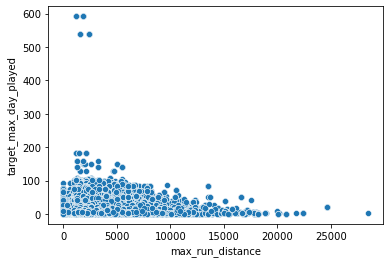

In [135]:
sb.scatterplot(x=cleaned_data['max_run_distance'], y=cleaned_data['target_max_day_played'])
plt.show()

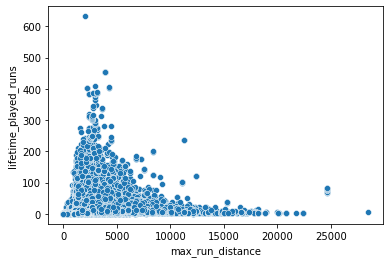

In [136]:
sb.scatterplot(x=cleaned_data['max_run_distance'], y=cleaned_data['lifetime_played_runs'])
plt.show()

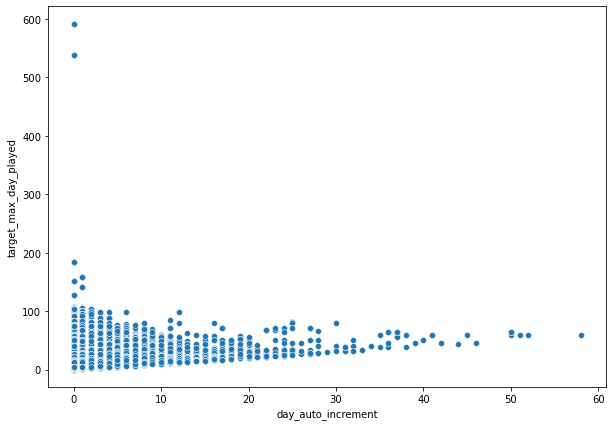

In [281]:
plt.figure(figsize = (10,7))
sb.scatterplot(x=cleaned_data['day_auto_increment'], y=cleaned_data['target_max_day_played'])
plt.show()

In [138]:
# for i in range(len(cleaned_data.columns)):
#     sb.displot(cleaned_data.iloc[:,i])
#     plt.show()

In [139]:
print('number of players that reached 94 max day played:',len(cleaned_data[(['mission_id','target_max_day_played'])][cleaned_data['target_max_day_played']==94]))
cleaned_data[(['mission_id','target_max_day_played'])][cleaned_data['target_max_day_played']==94]

number of players that reached 94 max day played: 70


mission_id  target_max_day_played
483640          115                     94
483641          113                     94
483642          109                     94
483643           11                     94
483644            6                     94
483645            3                     94
483646          114                     94
483647           86                     94
483648           12                     94
483649           10                     94
674550          113                     94
674551          109                     94
674552          115                     94
674553           11                     94
674554            3                     94
674555          114                     94
674556           19                     94
674557            6                     94
674558           86                     94
674559           12                     94
967560          115                     94
967561          113                     94
967562          109                     94
967563          114                     94
967564           11                     94
967565            3                     94
967566           12                     94
967567            6                     94
967568           86                     94
967569           19                     94
1164830         115                     94
1164831         113                     94
1164832         109                     94
1164833         114                     94
1164834           3                     94
1164835          11                     94
1164836          19                     94
1164837          86                     94
1164838           6                     94
1164839          12                     94
1431800         115                     94
1431801         113                     94
1431802         109                     94
1431803          11                     94
1431804           3                     94
1431805         114                     94
1431806          12                     94
1431807          19                     94
1431808          86                     94
1431809          66                     94
1731060         113                     94
1731061         109                     94
1731062         115                     94
1731063          11                     94
1731064         114                     94
1731065           3                     94
1731066          19                     94
1731067           6                     94
1731068          12                     94
1731069          86                     94
2165670         113                     94
2165671         109                     94
2165672         115                     94
2165673          11                     94
2165674           3                     94
2165675         114                     94
2165676           6                     94
2165677          19                     94
2165678          12                     94
2165679          86                     94

In [140]:
cleaned_data.sort_values(by=['target_max_day_played','pseudo_id'],ascending=False)

pseudo_id  mission_completed  mission_id  mission_difficulty  \
949450      95405                  3         113                   1   
949451      95405                  4         109                   1   
949452      95405                  5         115                   1   
949453      95405                  6         114                   1   
949454      95405                  7          11                   1   
...           ...                ...         ...                 ...   
105            10                  8          19                   2   
106            10                  9           6                   1   
107            10                 10           3                   1   
108            10                 11          86                   2   
109            10                 12          12                   2   

        mission_stars_collected  day_auto_increment  lifetime_played_runs  \
949450                        3                   0                     1   
949451                        3                   0                     1   
949452                        3                   0                     1   
949453                        6                   0                     2   
949454                        6                   0                     2   
...                         ...                 ...                   ...   
105                           8                   0                     6   
106                           8                   0                     6   
107                           8                   0                     6   
108                          12                   0                     7   
109                          12                   0                     7   

        max_run_distance  total_purchases_virtual  total_ads_watched  \
949450              1178                        0                  0   
949451              1178                        0                  0   
949452              1178                        0                  0   
949453              1855                        0                  0   
949454              1855                        0                  0   
...                  ...                      ...                ...   
105                 2754                        0                 13   
106                 2754                        0                 13   
107                 2754                        0                 14   
108                 3338                        0                 17   
109                 3338                        0                 17   

        total_purchases_real geo_country  days_played_in_month  \
949450                   0.0      France                     0   
949451                   0.0      France                     0   
949452                   0.0      France                     0   
949453                   0.0      France                     0   
949454                   0.0      France                     0   
...                      ...         ...                   ...   
105                      0.0    Paraguay                     0   
106                      0.0    Paraguay                     0   
107                      0.0    Paraguay                     0   
108                      0.0    Paraguay                     0   
109                      0.0    Paraguay                     0   

        virtual_currency_balance             event_timestamp  \
949450                      5791  2022-02-14 17:17:46.443000   
949451                      5791  2022-02-14 17:17:47.283000   
949452                      5791  2022-02-14 17:18:05.368000   
949453                      6307  2022-02-14 17:31:29.953000   
949454                      6307  2022-02-14 17:31:33.081000   
...                          ...                         ...   
105                         7291  2022-02-22 15:02:33.301000   
106                         7291  2022-02-22 15:

In [141]:
print('number of players that reached 592 max day played:',len(cleaned_data['target_max_day_played'][cleaned_data['target_max_day_played']==592]))
cleaned_data[cleaned_data['target_max_day_played']==592]

number of players that reached 592 max day played: 10


pseudo_id  mission_completed  mission_id  mission_difficulty  \
949450      95405                  3         113                   1   
949451      95405                  4         109                   1   
949452      95405                  5         115                   1   
949453      95405                  6         114                   1   
949454      95405                  7          11                   1   
949455      95405                  8           3                   1   
949456      95405                  9           6                   1   
949457      95405                 10          12                   2   
949458      95405                 11          86                   2   
949459      95405                 12          19                   2   

        mission_stars_collected  day_auto_increment  lifetime_played_runs  \
949450                        3                   0                     1   
949451                        3                   0                     1   
949452                        3                   0                     1   
949453                        6                   0                     2   
949454                        6                   0                     2   
949455                        6                   0                     2   
949456                        9                   0                     3   
949457                       10                   0                     4   
949458                       12                   0                     5   
949459                       12                   0                     5   

        max_run_distance  total_purchases_virtual  total_ads_watched  \
949450              1178                        0                  0   
949451              1178                        0                  0   
949452              1178                        0                  0   
949453              1855                        0                  0   
949454              1855                        0                  0   
949455              1855                        0                  0   
949456              1855                        0                  1   
949457              1855                        0                  2   
949458              1855                        0                  2   
949459              1855                        0                  2   

        total_purchases_real geo_country  days_played_in_month  \
949450                   0.0      France                     0   
949451                   0.0      France                     0   
949452                   0.0      France                     0   
949453                   0.0      France                     0   
949454                   0.0      France                     0   
949455                   0.0      France                     0   
949456                   0.0      France                     0   
949457                   0.0      France                     0   
949458                   0.0      France                     0   
949459                   0.0      France                     0   

        virtual_currency_balance             event_timestamp  \
949450                      5791  2022-02-14 17:17:46.443000   
949451                      5791  2022-02-14 17:17:47.283000   
949452                      5791  2022-02-14 17:18:05.368000   
949453                      6307  2022-02-14 17:31:29.953000   
949454                      6307  2022-02-14 17:31:33.081000   
949455                      6307  2022-02-14 17:32:20.829000   
949456                      7560  2022-02-14 20:49:39.720000   
949457                      8884  2022-02-14 20:52:46.482000   
949458                      8884  2022-02-14 21:02:39.462000   
949459                      8884  2022-02-14 21:03:16.605000   

        target_max_day_played  module_played  
949450                    592              1  
949451                    592              2  
9

In [142]:
clean_data.loc[[949450]]

pseudo_id  mission_completed mission_id  mission_difficulty  \
949450      94945                  3        115                   1   

        mission_stars_collected  day_auto_increment  lifetime_played_runs  \
949450                        3                   0                     1   

        max_run_distance  total_purchases_virtual  total_ads_watched  \
949450              1342                        0                  0   

        total_purchases_real geo_country  days_played_in_month  \
949450                   0.0      France                     0   

        virtual_currency_balance         event_timestamp  \
949450                      5582 2022-02-23 12:25:32.807   

        target_max_day_played  module_played  
949450                      5              1

In [155]:
# cleaned_data[(['mission_id','target_max_day_played'])] = clean_data['target_max_day_played']>clean_data['target_max_day_played'].mean()
cleaned_data[(['mission_id','target_max_day_played'])][clean_data['target_max_day_played']>clean_data['target_max_day_played'].mean()].sort_values(by=['target_max_day_played'],ascending = False)

C:\Users\Romeo\AppData\Local\Temp/ipykernel_15756/503512932.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data[(['mission_id','target_max_day_played'])][clean_data['target_max_day_played']>clean_data['target_max_day_played'].mean()].sort_values(by=['target_max_day_played'],ascending = False)


mission_id  target_max_day_played
9159             12                     20
9150            113                     20
9157             86                     20
9156              6                     20
9155             11                     20
9154              3                     20
9153            114                     20
9152            115                     20
9151            109                     20
9158             19                     20
73328             6                     16
73320           115                     16
73321           113                     16
73322            11                     16
73323           109                     16
73324             3                     16
73325            19                     16
73326           114                     16
73329            10                     16
73327            86                     16
739              10                     11
738              86                     11
732             115                     11
733              11                     11
734             114                     11
735               6                     11
736               3                     11
737              19                     11
730             113                     11
731             109                     11
303612           11                     10
303618           19                     10
303617           86                     10
303616           12                     10
303615            3                     10
303614          114                     10
303613          109                     10
303611          113                     10
2407344           3                     10
303619           10                     10
2407340         113                     10
2407341         115                     10
2407342         109                     10
2407343          11                     10
2407345         114                     10
2407346           6                     10
2407347          19                     10
2407348          86                     10
303610          115                     10
2407349          12                     10
112398           86                      8
368650           94                      8
112395          109                      8
112394          114                      8
112393           11                      8
112392            3                      8
112391          113                      8
112390          115                      8
112399           12                      8
368651          109                      8
112397           19                      8
368652           11                      8
368653          115                      8
368654          114                      8
368655            3                      8
368656           19                      8
368657           12                      8
368658           86                      8
112396            6                      8
194979           12                      8
194970          113                      8
194973          115                      8
194978           86                      8
194971          109                      8
194972           11                      8
368659            6                      8
194974            6                      8
194975          114                      8
194976            3                      8
194977           19                      8
291701          113                      7
291702          109                      7
291703            3                      7
291704           11                      7
291705          114                      7
291706           19                      7
291707           86                      7
291708           12                      7
291700          115                      7
291709           10                      7
384312            3                      5
384310          115                      5
304730    

In [157]:
cleaned_data.shape

(2669800, 17)

## Modelling

### I will initially try to predict the target_max_day_played. As the dataframe has more than 2 million rows, I will only take a sample of it

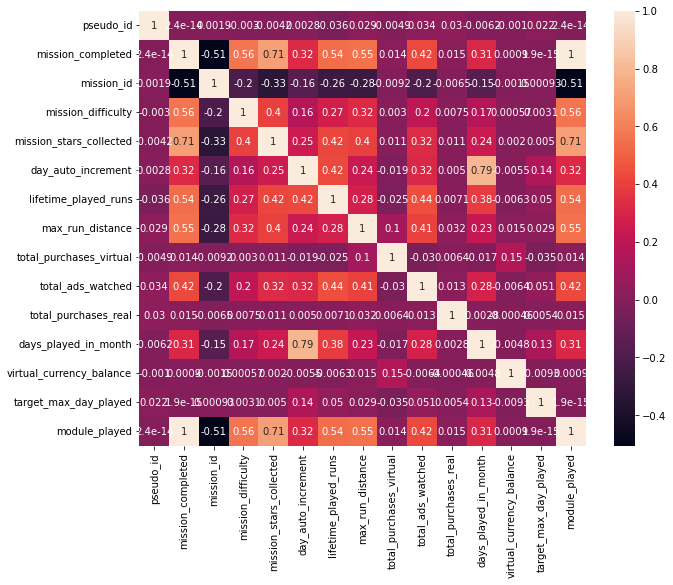

In [158]:
corr_matrix=cleaned_data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sb.heatmap(corr_matrix, annot=True)
plt.show()

### There is a high correlation between days_played_in_month and day_auto_increment. The Target Label has little correlation with any of the features

In [159]:
cleaned_data.dtypes

pseudo_id                     int64
mission_completed             int64
mission_id                    int64
mission_difficulty            int64
mission_stars_collected       int64
day_auto_increment            int64
lifetime_played_runs          int64
max_run_distance              int64
total_purchases_virtual       int64
total_ads_watched             int64
total_purchases_real        float64
geo_country                  object
days_played_in_month          int64
virtual_currency_balance      int64
event_timestamp              object
target_max_day_played         int64
module_played                 int64
dtype: object

In [160]:
cleaned_data.mission_completed = cleaned_data['mission_completed'].astype(object)
cleaned_data.mission_id = cleaned_data['mission_id'].astype(object)
cleaned_data.geo_country = cleaned_data['geo_country'].astype(object)
cleaned_data.module_played = cleaned_data['module_played'].astype(object)

In [161]:
cleaned_data.dtypes

pseudo_id                     int64
mission_completed            object
mission_id                   object
mission_difficulty            int64
mission_stars_collected       int64
day_auto_increment            int64
lifetime_played_runs          int64
max_run_distance              int64
total_purchases_virtual       int64
total_ads_watched             int64
total_purchases_real        float64
geo_country                  object
days_played_in_month          int64
virtual_currency_balance      int64
event_timestamp              object
target_max_day_played         int64
module_played                object
dtype: object

### As the dataframe is so big, I will get a sample of the data in order to run the models

In [162]:
%%time
data_sample = cleaned_data.sample(n = 20000)

Wall time: 1.09 s


In [163]:
data_sample.shape
data_sample

pseudo_id mission_completed mission_id  mission_difficulty  \
51681         5197                 4        113                   1   
1223521     122947                 4        113                   1   
1096421     110156                 4        115                   1   
603063       60620                 6        109                   1   
2646131     265808                 4        109                   1   
...            ...               ...        ...                 ...   
44816         4507                 9          3                   1   
168772       16959                 5        109                   1   
121246       12182                 9          3                   1   
2333383     234448                 6         11                   1   
2158378     216899                11         86                   2   

         mission_stars_collected  day_auto_increment  lifetime_played_runs  \
51681                          4                   1                     2   
1223521                        4                   0                     2   
1096421                        4                   1                     3   
603063                         5                   1                     4   
2646131                        4                   0                     5   
...                          ...                 ...                   ...   
44816                          9                   0                     4   
168772                         5                   1                     3   
121246                         7                   0                     4   
2333383                        6                   0                     2   
2158378                       12                   1                     7   

         max_run_distance  total_purchases_virtual  total_ads_watched  \
51681                1348                        0                  0   
1223521              2262                     4000                  0   
1096421              1134                     4500                  0   
603063               1159                        0                  4   
2646131              1240                      500                  0   
...                   ...                      ...                ...   
44816                5206                     4500                  3   
168772               2773                     4000                  1   
121246               1918                     1500                  0   
2333383              1593                        0                  0   
2158378              2115                    25500                  3   

         total_purchases_real     geo_country  days_played_in_month  \
51681                    0.00      Uzbekistan                     1   
1223521                  0.00          Mexico                     0   
1096421                  0.00          Mexico                     1   
603063                   0.00           India                     1   
2646131                  0.00  United Kingdom                     0   
...                       ...             ...                   ...   
44816                    0.00        Suriname                     0   
168772                   0.00     New Zealand                     1   
121246                   0.00         Czechia                     0   
2333383                  0.00   United States                     0   
2158378                  1.99   United States                     0   

         virtual_currency_balance             event_timestamp  \
51681                        5731  2022-02-12 04:38:38.872000   
1223521                      5553  2022-02-12 14:39:30.265000   
1096421                      1178     2022-02-24 14:03:51.682   
603063                       5955     2022-02-05 10:01:21.703   
2646131                      5005  2022-02-05 12:11:32.512000   
...                           ...                         ...   
44816                        4007 

In [164]:
### Dropping some columns that are not required but also would give problems when I come to OneHotEncode

In [165]:
X = data_sample.drop(['target_max_day_played','pseudo_id','days_played_in_month','event_timestamp','mission_id','geo_country'],axis=1)
y = data_sample['target_max_day_played']

In [166]:
X

mission_completed  mission_difficulty  mission_stars_collected  \
51681                   4                   1                        4   
1223521                 4                   1                        4   
1096421                 4                   1                        4   
603063                  6                   1                        5   
2646131                 4                   1                        4   
...                   ...                 ...                      ...   
44816                   9                   1                        9   
168772                  5                   1                        5   
121246                  9                   1                        7   
2333383                 6                   1                        6   
2158378                11                   2                       12   

         day_auto_increment  lifetime_played_runs  max_run_distance  \
51681                     1                     2              1348   
1223521                   0                     2              2262   
1096421                   1                     3              1134   
603063                    1                     4              1159   
2646131                   0                     5              1240   
...                     ...                   ...               ...   
44816                     0                     4              5206   
168772                    1                     3              2773   
121246                    0                     4              1918   
2333383                   0                     2              1593   
2158378                   1                     7              2115   

         total_purchases_virtual  total_ads_watched  total_purchases_real  \
51681                          0                  0                  0.00   
1223521                     4000                  0                  0.00   
1096421                     4500                  0                  0.00   
603063                         0                  4                  0.00   
2646131                      500                  0                  0.00   
...                          ...                ...                   ...   
44816                       4500                  3                  0.00   
168772                      4000                  1                  0.00   
121246                      1500                  0                  0.00   
2333383                        0                  0                  0.00   
2158378                    25500                  3                  1.99   

         virtual_currency_balance module_played  
51681                        5731             2  
1223521                      5553             2  
1096421                      1178             2  
603063                       5955             4  
2646131                      5005             2  
...                           ...           ...  
44816                        4007             7  
168772                       2391             3  
121246                       5210             7  
2333383                      6258             4  
2158378                      1854             9  

[20000 rows x 11 columns]

In [167]:
X.dtypes

mission_completed            object
mission_difficulty            int64
mission_stars_collected       int64
day_auto_increment            int64
lifetime_played_runs          int64
max_run_distance              int64
total_purchases_virtual       int64
total_ads_watched             int64
total_purchases_real        float64
virtual_currency_balance      int64
module_played                object
dtype: object

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

numericals_train = X_train.select_dtypes(np.number).reset_index()
num_train_index = numericals_train[['index']]
numericals_train = numericals_train.drop(['index'],axis=1)

numericals_test = X_test.select_dtypes(np.number).reset_index()
num_test_index = numericals_test[['index']]
numericals_test = numericals_test.drop(['index'],axis=1)

categoricals_train = X_train.select_dtypes(object).reset_index()
cat_train_index = categoricals_train[['index']]
categoricals_train = categoricals_train.drop(['index'],axis=1)

categoricals_test = X_test.select_dtypes(object).reset_index()
cat_test_index = categoricals_test[['index']]
categoricals_test = categoricals_test.drop(['index'],axis=1)

In [169]:
num_test_index

index
0      963093
1      212117
2     2314683
3     1761777
4      752556
...       ...
3995    15723
3996  2533713
3997   387570
3998  1644567
3999   120510

[4000 rows x 1 columns]

In [170]:
categoricals_train

mission_completed module_played
0                     5             3
1                     4             2
2                     9             7
3                    10             8
4                     5             3
...                 ...           ...
15995                 3             1
15996                 3             1
15997                 9             7
15998                 9             7
15999                 7             5

[16000 rows x 2 columns]

### Scale and Encode

In [171]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

transformer = MinMaxScaler().fit(numericals_train)
numericals_train_normalized = transformer.transform(numericals_train)

normalized_numericals_train = pd.DataFrame(numericals_train_normalized,columns=numericals_train.columns).reset_index(drop=True)

numericals_test_normalized = transformer.transform(numericals_test)
normalized_numericals_test = pd.DataFrame(numericals_test_normalized,columns=numericals_test.columns).reset_index(drop=True)

print(normalized_numericals_train.shape)
print(normalized_numericals_test.shape)

encoder = OneHotEncoder(drop='first').fit(categoricals_train)
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
cols_train = encoder.get_feature_names_out(input_features=categoricals_train.columns)
encoded_categorical_train = pd.DataFrame(categoricals_train_encoded, index=categoricals_train.index, 
                                         columns=[i.lower() for i in cols_train]).reset_index(drop=True)

categoricals_test_encoded = encoder.transform(categoricals_test).toarray()
cols_test = encoder.get_feature_names_out(input_features=categoricals_test.columns)
encoded_categorical_test = pd.DataFrame(categoricals_test_encoded, index=categoricals_test.index, 
                                        columns=[i.lower() for i in cols_test]).reset_index(drop=True)


print(encoded_categorical_train.shape)
print(encoded_categorical_test.shape)

(16000, 9)
(4000, 9)
(16000, 18)
(4000, 18)


In [172]:
print(categoricals_train.shape)
print(categoricals_test.shape)
display(categoricals_train.columns)
display(categoricals_test.columns)
categoricals_train

(16000, 2)
(4000, 2)


Index(['mission_completed', 'module_played'], dtype='object')

Index(['mission_completed', 'module_played'], dtype='object')

mission_completed module_played
0                     5             3
1                     4             2
2                     9             7
3                    10             8
4                     5             3
...                 ...           ...
15995                 3             1
15996                 3             1
15997                 9             7
15998                 9             7
15999                 7             5

[16000 rows x 2 columns]

In [173]:
# encoder = OneHotEncoder(drop='first').fit(categoricalX)
# encoded_categorical = encoder.transform(categoricalX).toarray()
# cols = encoder.get_feature_names(input_features=categoricalX.columns)
# encoded_categorical = pd.DataFrame(encoded_categorical, index=categoricalX.index, columns=[i.lower() for i in cols])
print(normalized_numericals_train.shape)
encoded_categorical_train.shape

(16000, 9)


(16000, 18)

In [174]:
X_train = pd.concat([normalized_numericals_train, encoded_categorical_train],axis=1)
X_test = pd.concat([normalized_numericals_test, encoded_categorical_test],axis=1)

In [175]:
X_train

mission_difficulty  mission_stars_collected  day_auto_increment  \
0                     0.0                 0.227273                0.00   
1                     0.0                 0.136364                0.04   
2                     1.0                 0.363636                0.00   
3                     1.0                 0.454545                0.12   
4                     0.0                 0.181818                0.00   
...                   ...                      ...                 ...   
15995                 0.0                 0.136364                0.00   
15996                 0.0                 0.136364                0.00   
15997                 1.0                 0.409091                0.08   
15998                 1.0                 0.409091                0.16   
15999                 0.0                 0.318182                0.00   

       lifetime_played_runs  max_run_distance  total_purchases_virtual  \
0                  0.015544          0.165122                 0.000508   
1                  0.005181          0.098411                 0.000000   
2                  0.020725          0.120179                 0.000508   
3                  0.041451          0.154031                 0.000445   
4                  0.010363          0.104122                 0.000191   
...                     ...               ...                      ...   
15995              0.005181          0.107764                 0.000000   
15996              0.005181          0.139712                 0.000000   
15997              0.129534          0.304089                 0.001143   
15998              0.056995          0.265602                 0.000000   
15999              0.015544          0.166363                 0.000064   

       total_ads_watched  total_purchases_real  virtual_currency_balance  \
0               0.000000                   0.0              2.029296e-06   
1               0.000000                   0.0              5.562482e-06   
2               0.020619                   0.0              2.497441e-06   
3               0.020619                   0.0              2.047379e-06   
4               0.020619                   0.0              4.129919e-06   
...                  ...                   ...                       ...   
15995           0.000000                   0.0              5.474077e-06   
15996           0.000000                   0.0              5.757375e-06   
15997           0.061856                   0.0              2.179987e-07   
15998           0.041237                   0.0              1.149767e-05   
15999           0.000000                   0.0              4.465456e-06   

       mission_completed_4  mission_completed_5  mission_completed_6  \
0                      0.0                  1.0                  0.0   
1                      1.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  1.0                  0.0   
...                    ...                  ...                  ...   
15995                  0.0                  0.0                  0.0   
15996                  0.0                  0.0                  0.0   
15997                  0.0                  0.0                  0.0   
15998                  0.0                  0.0                  0.0   
15999                  0.0                  0.0                  0.0   

       mission_completed_7  mission_completed_8  mission_completed_9  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  1.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                

In [176]:
print(X_train.shape)
print(X_test.shape)
display(X_train.isna().sum().sum())
display(X_test.isna().sum().sum())

(16000, 27)
(4000, 27)


0

0

### Linear Regression

In [197]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

LR = linear_model.LinearRegression().fit(X_train,y_train)

# R2 Score

score = LR.score(X_test, y_test)

print("r2 score is:", score)

# Predictions

y_pred = LR.predict(X_test)




# from sklearn import linear_model
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# import math
# lm = linear_model.LinearRegression()
# lm.fit(X_train,y_train)

# predictions = lm.predict(X_train)
# r2_score(y_train, predictions)

# predictions_test = lm.predict(X_test)
# r2 = r2_score(y_test, predictions_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("mse is:", mse)
print("mae is:",mae)
print("rmse is:",rmse)

r2 score is: 0.02547730735689091
mse is: 63.50668153238945
mae is: 4.934101856016786
rmse is: 7.9691079508555696


### XGBRegressor

In [178]:
# source: https://www.analyticsvidhya.com/blog/2021/06/predict-future-sales-using-xgbregressor/#h2_7
# source: https://xgboost.readthedocs.io/en/stable/
# !pip install xgboost

In [179]:
from xgboost import XGBRegressor
import xgboost as xgb

In [180]:
model = XGBRegressor(
    max_depth=10,
    n_estimators= 500, #3000
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)


In [181]:
model.fit(
    X_train, 
    y_train, 
    eval_metric='rmse', 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 40)


C:\Users\Romeo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Romeo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:9.68976	validation_1-rmse:9.76160
[1]	validation_0-rmse:9.34670	validation_1-rmse:9.46608
[2]	validation_0-rmse:9.04649	validation_1-rmse:9.21797
[3]	validation_0-rmse:8.79006	validation_1-rmse:9.01269
[4]	validation_0-rmse:8.56866	validation_1-rmse:8.84373
[5]	validation_0-rmse:8.38873	validation_1-rmse:8.70614
[6]	validation_0-rmse:8.23396	validation_1-rmse:8.58775
[7]	validation_0-rmse:8.10705	validation_1-rmse:8.49439
[8]	validation_0-rmse:7.98352	validation_1-rmse:8.41375
[9]	validation_0-rmse:7.87629	validation_1-rmse:8.35041
[10]	validation_0-rmse:7.77722	validation_1-rmse:8.29949
[11]	validation_0-rmse:7.69335	validation_1-rmse:8.25775
[12]	validation_0-rmse:7.58954	validation_1-rmse:8.22236
[13]	validation_0-rmse:7.52244	validation_1-rmse:8.19576
[14]	validation_0-rmse:7.45684	validation_1-rmse:8.17585
[15]	validation_0-rmse:7.40809	validation_1-rmse:8.15910
[16]	validation_0-rmse:7.36955	validation_1-rmse:8.14828
[17]	validation_0-rmse:7.31458	validation

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=0.5,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

In [182]:
%%time
data_sample = cleaned_data.sample(n = 500000)

Wall time: 577 ms


In [183]:
%%time


X = data_sample.drop(['target_max_day_played','pseudo_id','days_played_in_month','event_timestamp','mission_id'
                   ,'geo_country'],axis=1)
y = data_sample['target_max_day_played']

# X train split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

numericals_train = X_train.select_dtypes(np.number).reset_index()
num_train_index = numericals_train[['index']]
numericals_train = numericals_train.drop(['index'],axis=1)

numericals_test = X_test.select_dtypes(np.number).reset_index()
num_test_index = numericals_test[['index']]
numericals_test = numericals_test.drop(['index'],axis=1)

categoricals_train = X_train.select_dtypes(object).reset_index()
cat_train_index = categoricals_train[['index']]
categoricals_train = categoricals_train.drop(['index'],axis=1)

categoricals_test = X_test.select_dtypes(object).reset_index()
cat_test_index = categoricals_test[['index']]
categoricals_test = categoricals_test.drop(['index'],axis=1)

# MinMax Scaler

transformer = MinMaxScaler().fit(numericals_train)
numericals_train_normalized = transformer.transform(numericals_train)

normalized_numericals_train = pd.DataFrame(numericals_train_normalized, 
                                           columns=numericals_train.columns).reset_index(drop=True)

numericals_test_normalized = transformer.transform(numericals_test)
normalized_numericals_test = pd.DataFrame(numericals_test_normalized, 
                                          columns=numericals_test.columns).reset_index(drop=True)

# OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train)
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
cols_train = encoder.get_feature_names_out(input_features=categoricals_train.columns)
encoded_categorical_train = pd.DataFrame(categoricals_train_encoded, index=categoricals_train.index, 
                                         columns=[i.lower() for i in cols_train]).reset_index(drop=True)

categoricals_test_encoded = encoder.transform(categoricals_test).toarray()
cols_test = encoder.get_feature_names_out(input_features=categoricals_test.columns)
encoded_categorical_test = pd.DataFrame(categoricals_test_encoded, index=categoricals_test.index, 
                                        columns=[i.lower() for i in cols_test]).reset_index(drop=True)

# Putting it in a dataframe
X_train = pd.concat([normalized_numericals_train, encoded_categorical_train],axis=1)
X_test = pd.concat([normalized_numericals_test, encoded_categorical_test],axis=1)



model = XGBRegressor(
    max_depth=10,
    n_estimators= 3000, #500 #3000
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)


model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 40)

C:\Users\Romeo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Romeo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:9.62784	validation_1-rmse:9.65281
[1]	validation_0-rmse:9.31809	validation_1-rmse:9.35032
[2]	validation_0-rmse:9.05754	validation_1-rmse:9.09795
[3]	validation_0-rmse:8.84595	validation_1-rmse:8.89402
[4]	validation_0-rmse:8.66290	validation_1-rmse:8.71805
[5]	validation_0-rmse:8.51008	validation_1-rmse:8.57271
[6]	validation_0-rmse:8.38225	validation_1-rmse:8.45302
[7]	validation_0-rmse:8.27582	validation_1-rmse:8.35414
[8]	validation_0-rmse:8.18753	validation_1-rmse:8.27347
[9]	validation_0-rmse:8.11475	validation_1-rmse:8.20686
[10]	validation_0-rmse:8.05558	validation_1-rmse:8.15511
[11]	validation_0-rmse:8.00460	validation_1-rmse:8.11024
[12]	validation_0-rmse:7.96046	validation_1-rmse:8.07416
[13]	validation_0-rmse:7.92461	validation_1-rmse:8.04454
[14]	validation_0-rmse:7.89301	validation_1-rmse:8.02226
[15]	validation_0-rmse:7.86620	validation_1-rmse:8.00242
[16]	validation_0-rmse:7.84470	validation_1-rmse:7.98582
[17]	validation_0-rmse:7.82991	validation

[144]	validation_0-rmse:7.34801	validation_1-rmse:7.90566
[145]	validation_0-rmse:7.34432	validation_1-rmse:7.90552
[146]	validation_0-rmse:7.34217	validation_1-rmse:7.90558
[147]	validation_0-rmse:7.33971	validation_1-rmse:7.90538
[148]	validation_0-rmse:7.33834	validation_1-rmse:7.90543
Wall time: 1min 10s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=0.5,
             missing=nan, monotone_constraints='()', n_estimators=3000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

In [184]:
# %%time
# data_sample = xgb_module(data_sample)
# # xgb_module(cleaned_data)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

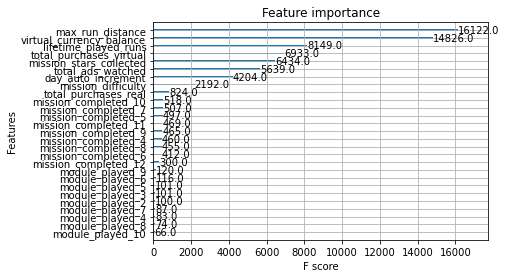

In [185]:
xgb.plot_importance(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 28800x1440 with 0 Axes>

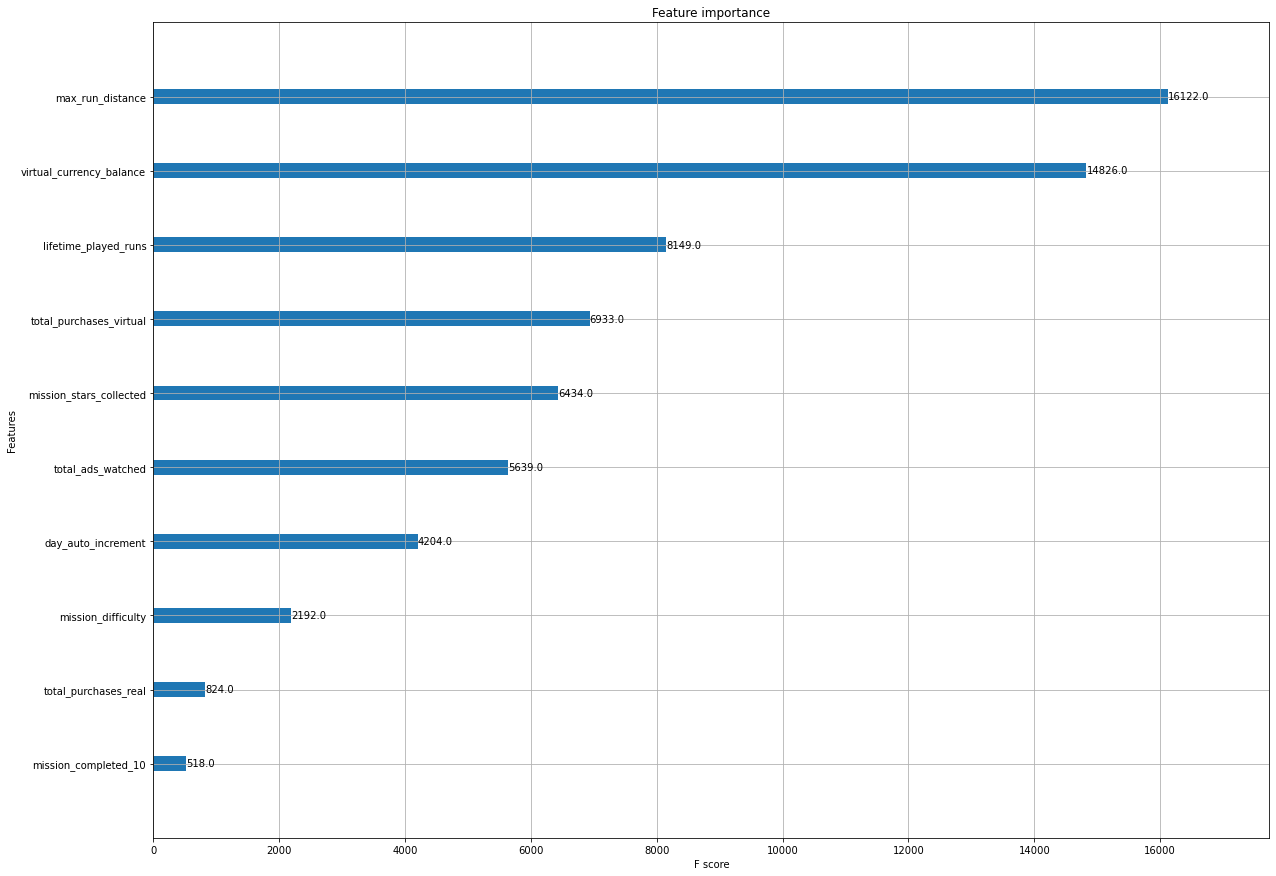

In [240]:
# Plot feature importance

# def plot_features(booster, figsize):    
#     fig, ax = plt.subplots(1,1,figsize=figsize)
#     return plot_importance(booster=booster, ax=ax)
# plot_features(model, (10,14))

# plt.figure(figsize=(40,20))
# plot_importance(model,max_num_features=100)
# plt.show()

plt.rcParams["figure.figsize"] = (20,15)
xgb.plot_importance(model,max_num_features=10)

In [187]:
%%time
Y_pred = model.predict(X_train)#.clip(0, 20)
Y_test = model.predict(X_test)#.clip(0, 20)


Wall time: 1.09 s


In [188]:
Y_pred.shape

(400000,)

In [189]:
num_test_index

index
0       626615
1       424676
2      2569425
3      2002499
4       210456
...        ...
99995   686276
99996   631715
99997   501813
99998  2031313
99999  2489692

[100000 rows x 1 columns]

In [190]:
pred = [round(value) for value in Y_test]
pred_df = pd.DataFrame(pred,columns=['pred'])
pred_df = pd.concat([num_test_index,pred_df],axis=1)
pred_df.set_index('index', inplace=True)
pred_df

pred
index        
626615      5
424676      8
2569425     6
2002499     5
210456      6
...       ...
686276      6
631715      5
501813      6
2031313     7
2489692     7

[100000 rows x 1 columns]

In [191]:
pred_df.columns

Index(['pred'], dtype='object')

In [192]:
y_df = pd.DataFrame(y_test)
y_df

target_max_day_played
626615                       0
424676                       6
2569425                      2
2002499                      7
210456                       8
...                        ...
686276                       4
631715                       3
501813                       4
2031313                      2
2489692                      8

[100000 rows x 1 columns]

In [193]:
merged_df = y_df.merge(pred_df, left_index=True, right_index=True)
merged_df

target_max_day_played  pred
626615                       0     5
424676                       6     8
2569425                      2     6
2002499                      7     5
210456                       8     6
...                        ...   ...
686276                       4     6
631715                       3     5
501813                       4     6
2031313                      2     7
2489692                      8     7

[100000 rows x 2 columns]

In [194]:
merged_df.to_csv('..\\..\\IronHack\\Final Project\\prediction.csv', index=False)

In [195]:
indexed_df = merged_df.copy()
indexed_df.insert(0, 'num', range(0, len(merged_df)))
indexed_df

num  target_max_day_played  pred
626615       0                      0     5
424676       1                      6     8
2569425      2                      2     6
2002499      3                      7     5
210456       4                      8     6
...        ...                    ...   ...
686276   99995                      4     6
631715   99996                      3     5
501813   99997                      4     6
2031313  99998                      2     7
2489692  99999                      8     7

[100000 rows x 3 columns]

In [243]:
indexed_df['delta'] = indexed_df['target_max_day_played']-indexed_df['pred']
indexed_df
indexed_df.sort_values(by=['delta','target_max_day_played'],ascending=False)#.reset_index(drop=True)

num  target_max_day_played  pred  delta
1182602  44083                    538     7    531
1312223  64535                    151    13    138
20257    50743                    107     5    102
2401539  14932                    100     6     94
565511    6283                     97     6     91
...        ...                    ...   ...    ...
2371598  98534                      2    19    -17
1252524  75835                      5    24    -19
2333102   1831                      2    21    -19
1776264  78498                      0    25    -25
1615004  54217                      4    53    -49

[100000 rows x 4 columns]

In [248]:
indexed_df.dtypes

num                      int64
target_max_day_played    int64
pred                     int64
delta                    int64
dtype: object

In [244]:
print('accuracy:',len(indexed_df.loc[(indexed_df['delta'] == 0)])/len(indexed_df))
print('correctly predicted:',len(indexed_df.loc[(indexed_df['delta'] == 0)]),'out of:',len(indexed_df))

accuracy: 0.0612
correctly predicted: 6120 out of: 100000


In [245]:
# variation of 1
print('accuracy:',len(indexed_df.loc[(indexed_df['delta'] <= 1)&(indexed_df['delta'] >= -1)])/len(indexed_df))
print('correctly predicted:',len(indexed_df.loc[(indexed_df['delta'] <= 1)&(indexed_df['delta'] >= -1)]),
      'out of:',len(indexed_df))

accuracy: 0.18163
correctly predicted: 18163 out of: 100000


In [297]:
# variation of 4
print('accuracy:',len(indexed_df.loc[(indexed_df['delta'] <= 4)&(indexed_df['delta'] >= -4)])/len(indexed_df))
print('correctly predicted:',len(indexed_df.loc[(indexed_df['delta'] <= 4)&(indexed_df['delta'] >= -4)]),
      'out of:',len(indexed_df))

accuracy: 0.612
correctly predicted: 61200 out of: 100000


In [249]:
# variation of 8 (rmse)
print('accuracy:',len(indexed_df.loc[(indexed_df['delta'] <= 8)&(indexed_df['delta'] >= -8)])/len(indexed_df))
print('correctly predicted:',len(indexed_df.loc[(indexed_df['delta'] <= 8)&(indexed_df['delta'] >= -8)]),
      'out of:',len(indexed_df))

accuracy: 0.90508
correctly predicted: 90508 out of: 100000


In [ ]:
indexed_df.to_csv('..\\..\\IronHack\\Final Project\\prediction_with_index.csv', index=False)

In [287]:
cleaned_data.target_max_day_played.max()
cleaned_data.loc[cleaned_data.target_max_day_played == 592]

pseudo_id  mission_completed  mission_id  mission_difficulty  \
949450      95405                  3         113                   1   
949451      95405                  4         109                   1   
949452      95405                  5         115                   1   
949453      95405                  6         114                   1   
949454      95405                  7          11                   1   
949455      95405                  8           3                   1   
949456      95405                  9           6                   1   
949457      95405                 10          12                   2   
949458      95405                 11          86                   2   
949459      95405                 12          19                   2   

        mission_stars_collected  day_auto_increment  lifetime_played_runs  \
949450                        3                   0                     1   
949451                        3                   0                     1   
949452                        3                   0                     1   
949453                        6                   0                     2   
949454                        6                   0                     2   
949455                        6                   0                     2   
949456                        9                   0                     3   
949457                       10                   0                     4   
949458                       12                   0                     5   
949459                       12                   0                     5   

        max_run_distance  total_purchases_virtual  total_ads_watched  \
949450              1178                        0                  0   
949451              1178                        0                  0   
949452              1178                        0                  0   
949453              1855                        0                  0   
949454              1855                        0                  0   
949455              1855                        0                  0   
949456              1855                        0                  1   
949457              1855                        0                  2   
949458              1855                        0                  2   
949459              1855                        0                  2   

        total_purchases_real geo_country  days_played_in_month  \
949450                   0.0      France                     0   
949451                   0.0      France                     0   
949452                   0.0      France                     0   
949453                   0.0      France                     0   
949454                   0.0      France                     0   
949455                   0.0      France                     0   
949456                   0.0      France                     0   
949457                   0.0      France                     0   
949458                   0.0      France                     0   
949459                   0.0      France                     0   

        virtual_currency_balance             event_timestamp  \
949450                      5791  2022-02-14 17:17:46.443000   
949451                      5791  2022-02-14 17:17:47.283000   
949452                      5791  2022-02-14 17:18:05.368000   
949453                      6307  2022-02-14 17:31:29.953000   
949454                      6307  2022-02-14 17:31:33.081000   
949455                      6307  2022-02-14 17:32:20.829000   
949456                      7560  2022-02-14 20:49:39.720000   
949457                      8884  2022-02-14 20:52:46.482000   
949458                      8884  2022-02-14 21:02:39.462000   
949459                      8884  2022-02-14 21:03:16.605000   

        target_max_day_played  module_played  
949450                    592              1  
949451                    592              2  
9

In [258]:
indexed_df['target_max_day_played'].max()
indexed_df[indexed_df['target_max_day_played']==538]

num  target_max_day_played  pred  delta
1182602  44083                    538     7    531

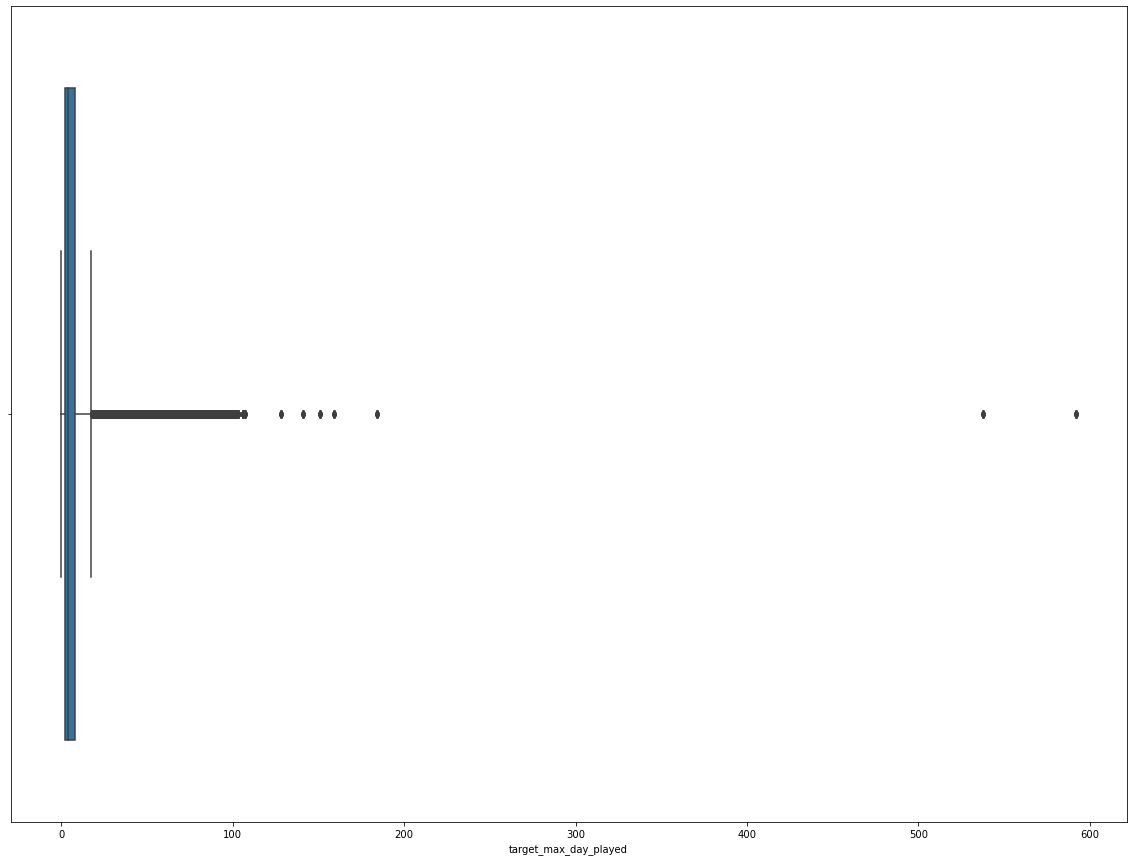

In [261]:
sb.boxplot(x=cleaned_data['target_max_day_played'])
plt.show()

In [262]:
iqr = np.percentile(cleaned_data['target_max_day_played'],75) - np.percentile(cleaned_data['target_max_day_played'],25)
upper_limit = np.percentile(cleaned_data['target_max_day_played'],75) + 1.5*iqr
lower_limit = np.percentile(cleaned_data['target_max_day_played'],25) - 1.5*iqr

In [277]:
upper_limit

17.0

In [264]:
# Will not execute this as it takes away too many impactful values but I will drop that 1 outlier

In [ ]:
# cleaned_data = cleaned_data.loc[cleaned_data.target_max_day_played != 592].reset_index(drop=True)
# cleaned_data = cleaned_data[cleaned_data['target_max_day_played']!= 592].reset_index(drop=True)
# cleaned_data.drop()
cleaned_data[cleaned_data.target_max_day_played != 592]

In [ ]:
cleaned_datata.sort_values(by=['target_max_day_played'],ascending=False)

In [274]:
indexed_df.sort_values(by=['target_max_day_played'],ascending=False)

num  target_max_day_played  pred  delta
1182602  44083                    538     7    531
1312223  64535                    151    13    138
20257    50743                    107     5    102
69074    34719                    103    20     83
2401539  14932                    100     6     94
...        ...                    ...   ...    ...
1575569  26646                      0     3     -3
1143075  26636                      0     2     -2
1198594  81902                      0     3     -3
2196127  81919                      0     6     -6
626615       0                      0     5     -5

[100000 rows x 4 columns]